In [15]:
! pip install -i https://pypi.tuna.tsinghua.edu.cn/simple sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.5/7.5 MB 2.5 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d0483ae358167537703c469d4a95a95663354e32643bd3617c6c354aa6c0c49d
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\68\b7\de\9d0947d82574c2a664942f4dd7f5b53b94267e50179e6a1360
Successfully built sklearn


In [3]:
! pip install seaborn

     ------------------------------------- 288.2/288.2 kB 72.9 kB/s eta 0:00:00


In [6]:
! pip install xlrd

     -------------------------------------- 96.5/96.5 kB 324.4 kB/s eta 0:00:00


In [8]:
! pip install openpyxl

     ------------------------------------ 242.1/242.1 kB 280.1 kB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Firstly, we open one of the category files - biology, and see what's in there. 
file = r'biology.json.xlsx'
df0 = pd.read_excel(file)
df0.head(3)

record         uri lang  isDuplicate        date      time  \
0     NaN  7216495856  eng        False  2022-10-07  17:31:00   
1     NaN  7231285056  eng        False  2022-10-19  16:35:00   
2     NaN  7211002059  eng        False  2022-10-03  15:56:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-10-07T17:31:00Z  2022-10-07T17:31:00Z     news  0.000000  ...   
1  2022-10-19T16:35:00Z  2022-10-19T16:34:00Z     news  0.000000  ...   
2  2022-10-03T15:56:00Z  2022-10-03T15:56:00Z     news  0.729412  ...   

      eventUri sentiment wgt  relevance authors uri.2 name type isAgency  \
0          NaN  0.011765  25         25     NaN   NaN  NaN  NaN      NaN   
1          NaN  0.223529  24         24     NaN   NaN  NaN  NaN      NaN   
2  eng-8068287 -0.027451  24         24     NaN   NaN  NaN  NaN      NaN   

   category  
0   biology  
1   biology  
2   biology  

[3 rows x 28 columns]

In [3]:
df0.describe()

record           uri         sim  source  sentiment         wgt  \
count     0.0  1.000000e+02  100.000000     0.0  98.000000  100.000000   
mean      NaN  7.215844e+09    0.154431     NaN   0.044498   18.740000   
std       NaN  1.114325e+07    0.280407     NaN   0.171362    1.750152   
min       NaN  7.195387e+09    0.000000     NaN  -0.513725   17.000000   
25%       NaN  7.206717e+09    0.000000     NaN  -0.049020   17.000000   
50%       NaN  7.213720e+09    0.000000     NaN   0.047059   19.000000   
75%       NaN  7.225229e+09    0.000000     NaN   0.160784   19.250000   
max       NaN  7.233955e+09    0.917647     NaN   0.443137   25.000000   

        relevance  authors  
count  100.000000      0.0  
mean    18.740000      NaN  
std      1.750152      NaN  
min     17.000000      NaN  
25%     17.000000      NaN  
50%     19.000000      NaN  
75%     19.250000      NaN  
max     25.000000      NaN

In [59]:
df0.columns  # list all the column names

Index(['record', 'uri', 'lang', 'isDuplicate', 'date', 'time', 'dateTime',
       'dateTimePub', 'dataType', 'sim', 'url', 'title', 'body', 'source',
       'uri.1', 'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment',
       'wgt', 'relevance', 'authors', 'uri.2', 'name', 'type', 'isAgency',
       'category'],
      dtype='object')

In [60]:
df0.iloc[5]['body'] # examine one of the article body within the category of biology

'Here, in our study, we analyzed high-quality transcriptomes in more than 112,000 individual cells from sciatic nerve tissue, which enabled deciphering the cellular composition of naive nerve among five major cell groups including Schwann cells, fibroblasts, lymphoid cells, myeloid cells, and vascular cells. Further, we also investigated the molecular consequences after injury using the chronic constriction injury (CCI) model10,11,12 in which rats develop chronic neuropathic pain within days of injury. Our study reports on the identification of 45 different cell subtypes in naive tissue, and 23 transient or persistent cell subtypes that emerge after injury, and reveals the ligand-receptor interactions among them. This study provides a foundational resource for the exploration of cellular interactions that accompany nerve injury, and may inspire future studies exploring novel drug targets as well as the causality that underlie the emergence and persistence of nociception in painful cond

In [61]:
# Check duplicated data - No repeated data. 
df0.duplicated().sum()

0

In [62]:
# Double check, since there is a column named 'isDuplicate'
df0_dup = df0[df0['isDuplicate'] == 'True']
print(df0_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [63]:
# Check empty data, especially the 'body' column
df0['body'].isnull().sum()

0

In [64]:
len(df0['body']) # how many records

100

In [65]:
# Then, we check the chemistry file, and see what's in there. 
file = r'chemistry.json.xlsx'
df1 = pd.read_excel(file)
df1.head(3)

record         uri lang  isDuplicate        date      time  \
0     NaN  7213732540  eng        False  2022-10-05  17:00:00   
1     NaN  7231239765  eng        False  2022-10-19  15:56:00   
2     NaN  7213560758  eng        False  2022-10-05  14:32:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-10-05T17:00:00Z  2022-10-05T17:00:00Z     news  0.670588  ...   
1  2022-10-19T15:56:00Z  2022-10-19T15:56:00Z     news  0.000000  ...   
2  2022-10-05T14:32:00Z  2022-10-05T14:31:00Z     news  0.682353  ...   

      eventUri sentiment wgt  relevance authors                    uri.2  \
0  eng-8076924  0.513725  21         21     NaN                      NaN   
1          NaN  0.168627  19         19     NaN                      NaN   
2  eng-8076924  0.207843  17         17     NaN  laura_baisas@popsci.com   

           name    type isAgency   category  
0           NaN     NaN      NaN  chemistry  
1           NaN     NaN      NaN  chemistry  
2  Laura Baisas  author    False  chemistry  

[3 rows x 28 columns]

In [66]:
df1.columns  # list all the column names

Index(['record', 'uri', 'lang', 'isDuplicate', 'date', 'time', 'dateTime',
       'dateTimePub', 'dataType', 'sim', 'url', 'title', 'body', 'source',
       'uri.1', 'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment',
       'wgt', 'relevance', 'authors', 'uri.2', 'name', 'type', 'isAgency',
       'category'],
      dtype='object')

In [67]:
# Check duplicated data - No repeated data. 
df1.duplicated().sum()

0

In [68]:
df1_dup = df1[df1['isDuplicate'] == 'True']
print(df1_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [69]:
# Check empty data, especially the 'body' column
df1['body'].isnull().sum()

0

In [70]:
# Double check, since there is a column named 'isDuplicate'
df1_dup = df1[df1['isDuplicate'] == 'True']
print(df1_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [71]:
# Check empty data, especially the 'body' column
df1['body'].isnull().sum()

0

In [72]:
len(df1['body']) # how many records

100

In [73]:
# Then, we check the chemistry file, and see what's in there. 
file = r'earth_sciences.json.xlsx'
df2 = pd.read_excel(file)
df2.head(3)

record           uri lang isDuplicate        date      time  \
0     NaN  7.231221e+09  eng       False  2022-10-19  15:40:00   
1     NaN  7.226882e+09  eng       False  2022-10-16  08:30:00   
2     NaN  7.223001e+09  eng       False  2022-10-13  04:25:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-10-19T15:40:00Z  2022-10-19T15:17:00Z     news  0.686275  ...   
1  2022-10-16T08:30:00Z  2022-10-16T07:58:00Z     news  0.000000  ...   
2  2022-10-13T04:25:00Z  2022-10-13T03:48:00Z     news  0.458824  ...   

      eventUri sentiment   wgt  relevance authors uri.2 name type isAgency  \
0   fra-898753 -0.105882  22.0       22.0     NaN   NaN  NaN  NaN      NaN   
1          NaN -0.145098  22.0       22.0     NaN   NaN  NaN  NaN      NaN   
2  eng-8091183 -0.019608  22.0       22.0     NaN   NaN  NaN  NaN      NaN   

         category  
0  earth_sciences  
1  earth_sciences  
2  earth_sciences  

[3 rows x 28 columns]

In [74]:
# Check duplicated data - No repeated data. 
df2.duplicated().sum()

0

In [75]:
# Double check, since there is a column named 'isDuplicate'
df2_dup = df2[df2['isDuplicate'] == 'True']
print(df2_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [76]:
# Check empty data, especially the 'body' column - There is indeed one line which is empty. 
df2['body'].isnull().sum()

1

In [77]:
# We just delete this line, and then update our dataframe
df2 = df2[df2['body'].notnull()]          

In [78]:
# Check empty data after deleted the empty row
df2['body'].isnull().sum()

0

In [79]:
len(df2['body'])  # how many records

100

In [80]:
# Then, we check the math file, and see what's in there. 
file = r'math.json.xlsx'
df3 = pd.read_excel(file)
df3.head(3)

record           uri lang isDuplicate        date      time  \
0     NaN  7.231245e+09  eng       False  2022-10-19  16:00:00   
1     NaN  7.225629e+09  eng       False  2022-10-15  00:45:00   
2     NaN  7.199811e+09  eng       False  2022-09-23  21:52:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-10-19T16:00:00Z  2022-10-19T16:00:00Z     news  0.000000  ...   
1  2022-10-15T00:45:00Z  2022-10-15T00:45:00Z     news  0.000000  ...   
2  2022-09-23T21:52:00Z  2022-09-23T21:51:00Z     news  0.494118  ...   

      eventUri sentiment   wgt  relevance authors uri.2 name type isAgency  \
0          NaN  0.152941  19.0       19.0     NaN   NaN  NaN  NaN      NaN   
1          NaN -0.011765  18.0       18.0     NaN   NaN  NaN  NaN      NaN   
2  eng-8042910  0.286275  17.0       17.0     NaN   NaN  NaN  NaN      NaN   

   category  
0      math  
1      math  
2      math  

[3 rows x 28 columns]

In [81]:
# Check duplicated data - No repeated data. 
df3.duplicated().sum()

0

In [83]:
# Double check, since there is a column named 'isDuplicate'
df3_dup = df3[df3['isDuplicate'] == 'True']
print(df3_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [84]:
# Check empty data, especially the 'body' column - There is one empty line
df3['body'].isnull().sum()

1

In [85]:
# We just delete this line, and then update our dataframe
df3 = df3[df3['body'].notnull()]  

In [86]:
# Check empty data after deleted the empty row
df3['body'].isnull().sum()

0

In [87]:
# Then, we check the physics file, and see what's in there. 
file = r'physics.json.xlsx'
df4 = pd.read_excel(file)
df4.head(3)

record         uri lang  isDuplicate        date      time  \
0     NaN  7197964128  eng        False  2022-09-22  13:04:00   
1     NaN  7215541720  eng        False  2022-10-07  02:05:00   
2     NaN  7215026857  eng        False  2022-10-06  15:52:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-09-22T13:04:00Z  2022-09-22T13:04:00Z     news  0.658824  ...   
1  2022-10-07T02:05:00Z  2022-10-07T01:46:00Z     news  0.635294  ...   
2  2022-10-06T15:52:00Z  2022-10-06T15:52:00Z     news  0.000000  ...   

                                   uri.2            name    type  isAgency  \
0  daniel_garisto@scientificamerican.com  Daniel Garisto  author     False   
1                                    NaN             NaN     NaN       NaN   
2                                    NaN             NaN     NaN       NaN   

                                               image     eventUri sentiment  \
0  https://static.scientificamerican.com/sciam/ca...  eng-8040541  0.411765   
1  https://images.theconversation.com/files/48867...  eng-8077009  0.129412   
2  https://media.springernature.com/m685/springer...          NaN  0.333333   

   wgt relevance category  
0   15        15  physics  
1   14        14  physics  
2   14        14  physics  

[3 rows x 28 columns]

In [88]:
# Check duplicated data - No repeated data. 
df4.duplicated().sum()

0

In [89]:
# Double check, since there is a column named 'isDuplicate'
df4_dup = df4[df4['isDuplicate'] == 'True']
print(df4_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, authors, uri.2, name, type, isAgency, image, eventUri, sentiment, wgt, relevance, category]
Index: []

[0 rows x 28 columns]


In [90]:
# Check empty data, especially the 'body' column
df4['body'].isnull().sum()

0

In [91]:
# Then, we check the social_sciences file, and see what's in there. 
file = r'social_sciences.json.xlsx'
df5 = pd.read_excel(file)
df5.head(3)

record         uri lang  isDuplicate        date      time  \
0     NaN  7225253201  eng        False  2022-10-14  16:42:00   
1     NaN  7216249944  eng        False  2022-10-07  13:51:00   
2     NaN  7231105588  eng         True  2022-10-19  14:07:00   

               dateTime           dateTimePub dataType       sim  ...  \
0  2022-10-14T16:42:00Z  2022-10-14T16:42:00Z     news  0.678431  ...   
1  2022-10-07T13:51:00Z  2022-10-07T13:19:00Z     news  0.000000  ...   
2  2022-10-19T14:07:00Z  2022-10-19T13:54:00Z     news  0.000000  ...   

      eventUri sentiment wgt  relevance authors uri.2 name type isAgency  \
0  eng-8101049 -0.129412  21         21     NaN   NaN  NaN  NaN      NaN   
1          NaN -0.176471  19         19     NaN   NaN  NaN  NaN      NaN   
2          NaN  0.121569  17         17     NaN   NaN  NaN  NaN      NaN   

          category  
0  social_sciences  
1  social_sciences  
2  social_sciences  

[3 rows x 28 columns]

In [92]:
# Check duplicated data - No repeated data. 
df5.duplicated().sum()

0

In [93]:
# Double check, since there is a column named 'isDuplicate'
df5_dup = df5[df5['isDuplicate'] == 'True']
print(df5_dup)

Empty DataFrame
Columns: [record, uri, lang, isDuplicate, date, time, dateTime, dateTimePub, dataType, sim, url, title, body, source, uri.1, dataType.1, title.1, image, eventUri, sentiment, wgt, relevance, authors, uri.2, name, type, isAgency, category]
Index: []

[0 rows x 28 columns]


In [94]:
# Check empty data, especially the 'body' column
df5['body'].isnull().sum()

0

Then, we need to merge all these files into one big dataframe. 

In [98]:
df = df0.merge(df1, how='outer', on=['record', 'uri', 'lang', 'isDuplicate', 'date', 
               'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 
               'url', 'title', 'body', 'source', 'uri.1', 
               'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment', 
               'wgt', 'relevance', 'authors', 'uri.2', 'name', 
               'type', 'isAgency', 'category'])   # merge based on all 28 columns

In [100]:
df = df.merge(df2, how='outer', on=['record', 'uri', 'lang', 'isDuplicate', 'date', 
               'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 
               'url', 'title', 'body', 'source', 'uri.1', 
               'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment', 
               'wgt', 'relevance', 'authors', 'uri.2', 'name', 
               'type', 'isAgency', 'category'])   # merge based on all 28 columns

In [102]:
df = df.merge(df3, how='outer', on=['record', 'uri', 'lang', 'isDuplicate', 'date', 
               'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 
               'url', 'title', 'body', 'source', 'uri.1', 
               'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment', 
               'wgt', 'relevance', 'authors', 'uri.2', 'name', 
               'type', 'isAgency', 'category'])   # merge based on all 28 columns

In [104]:
df = df.merge(df4, how='outer', on=['record', 'uri', 'lang', 'isDuplicate', 'date', 
               'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 
               'url', 'title', 'body', 'source', 'uri.1', 
               'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment', 
               'wgt', 'relevance', 'authors', 'uri.2', 'name', 
               'type', 'isAgency', 'category'])   # merge based on all 28 columns

In [106]:
df = df.merge(df5, how='outer', on=['record', 'uri', 'lang', 'isDuplicate', 'date', 
               'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 
               'url', 'title', 'body', 'source', 'uri.1', 
               'dataType.1', 'title.1', 'image', 'eventUri', 'sentiment', 
               'wgt', 'relevance', 'authors', 'uri.2', 'name', 
               'type', 'isAgency', 'category'])   # merge based on all 28 columns

In [107]:
df

record         uri lang isDuplicate        date      time  \
0       NaN  7216495856  eng       False  2022-10-07  17:31:00   
1       NaN  7231285056  eng       False  2022-10-19  16:35:00   
2       NaN  7211002059  eng       False  2022-10-03  15:56:00   
3       NaN  7223685172  eng       False  2022-10-13  14:17:00   
4       NaN  7206333164  eng       False  2022-09-29  10:31:00   
..      ...         ...  ...         ...         ...       ...   
595     NaN  7222207535  eng       False  2022-10-12  13:28:00   
596     NaN  7222108727  eng       False  2022-10-12  12:09:00   
597     NaN  7219754020  eng       False  2022-10-10  17:54:00   
598     NaN  7219637614  eng       False  2022-10-10  16:02:00   
599     NaN  7214739248  eng       False  2022-10-06  12:02:00   

                 dateTime           dateTimePub dataType       sim  ...  \
0    2022-10-07T17:31:00Z  2022-10-07T17:31:00Z     news  0.000000  ...   
1    2022-10-19T16:35:00Z  2022-10-19T16:34:00Z     news  0.000000  ...   
2    2022-10-03T15:56:00Z  2022-10-03T15:56:00Z     news  0.729412  ...   
3    2022-10-13T14:17:00Z  2022-10-13T14:16:00Z     news  0.619608  ...   
4    2022-09-29T10:31:00Z  2022-09-29T10:30:00Z     news  0.549020  ...   
..                    ...                   ...      ...       ...  ...   
595  2022-10-12T13:28:00Z  2022-10-12T13:28:00Z     news  0.000000  ...   
596  2022-10-12T12:09:00Z  2022-10-12T12:09:00Z     news  0.000000  ...   
597  2022-10-10T17:54:00Z  2022-10-10T17:53:00Z     news  0.000000  ...   
598  2022-10-10T16:02:00Z  2022-10-10T16:02:00Z     news  0.000000  ...   
599  2022-10-06T12:02:00Z  2022-10-06T12:02:00Z     news  0.000000  ...   

        eventUri sentiment wgt  relevance authors uri.2 name type isAgency  \
0            NaN  0.011765  25         25     NaN   NaN  NaN  NaN      NaN   
1            NaN  0.223529  24         24     NaN   NaN  NaN  NaN      NaN   
2    eng-8068287 -0.027451  24         24     NaN   NaN  NaN  NaN      NaN   
3    eng-8099487  0.137255  23         23     NaN   NaN  NaN  NaN      NaN   
4    eng-8057032 -0.050980  23         23     NaN   NaN  NaN  NaN      NaN   
..           ...       ...  ..        ...     ...   ...  ...  ...      ...   
595          NaN -0.317647   9          9     NaN   NaN  NaN  NaN      NaN   
596          NaN  0.223529   9          9     NaN   NaN  NaN  NaN      NaN   
597          NaN -0.027451   9          9     NaN   NaN  NaN  NaN      NaN   
598          NaN -0.098039   9          9     NaN   NaN  NaN  NaN      NaN   
599          NaN  0.286275   9          9     NaN   NaN  NaN  NaN      NaN   

            category  
0            biology  
1            biology  
2            biology  
3            biology  
4            biology  
..               ...  
595  social_sciences  
596  social_sciences  
597  social_sciences  
598  social_sciences  
599  social_sciences  

[600 rows x 28 columns]

In [110]:
# We output this dataframe to a file
! pip install openpyxl

     |████████████████████████████████| 242 kB 6.2 MB/s eta 0:00:01


In [112]:
df.to_excel('combined.xlsx')

This excel file now contains all of the records from all the 6 categories, with annotated category, and is added indices. It looks comfortable now. 
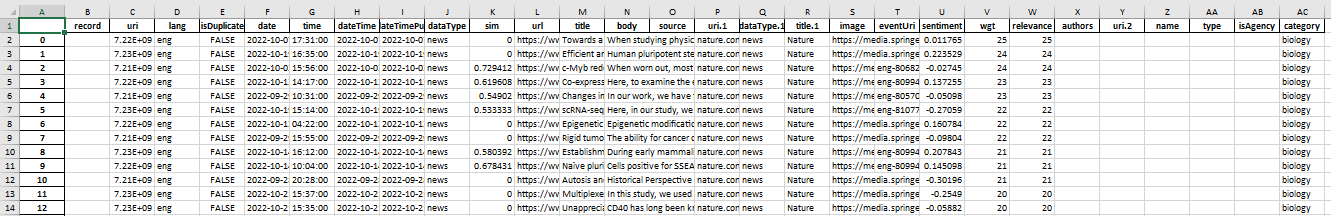

---------------------------------

(Execute the cell below for each time operation. )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r'combined.xlsx'
df = pd.read_excel(file)
df.head(3)

Unnamed: 0  record         uri lang  isDuplicate        date      time  \
0           0     NaN  7216495856  eng        False  2022-10-07  17:31:00   
1           1     NaN  7231285056  eng        False  2022-10-19  16:35:00   
2           2     NaN  7211002059  eng        False  2022-10-03  15:56:00   

               dateTime           dateTimePub dataType  ...     eventUri  \
0  2022-10-07T17:31:00Z  2022-10-07T17:31:00Z     news  ...          NaN   
1  2022-10-19T16:35:00Z  2022-10-19T16:34:00Z     news  ...          NaN   
2  2022-10-03T15:56:00Z  2022-10-03T15:56:00Z     news  ...  eng-8068287   

  sentiment wgt relevance  authors uri.2 name type isAgency category  
0  0.011765  25        25      NaN   NaN  NaN  NaN      NaN  biology  
1  0.223529  24        24      NaN   NaN  NaN  NaN      NaN  biology  
2 -0.027451  24        24      NaN   NaN  NaN  NaN      NaN  biology  

[3 rows x 29 columns]

In [3]:
df.shape

(600, 29)

In [4]:
col_list = df.columns.values.tolist()
col_list  # Let's see these columns

['Unnamed: 0',
 'record',
 'uri',
 'lang',
 'isDuplicate',
 'date',
 'time',
 'dateTime',
 'dateTimePub',
 'dataType',
 'sim',
 'url',
 'title',
 'body',
 'source',
 'uri.1',
 'dataType.1',
 'title.1',
 'image',
 'eventUri',
 'sentiment',
 'wgt',
 'relevance',
 'authors',
 'uri.2',
 'name',
 'type',
 'isAgency',
 'category']

In [5]:
df['uri.1'].describe()  # let's see what sources are these articles from

count            600
unique             8
top       nature.com
freq             418
Name: uri.1, dtype: object

In [6]:
df['uri.1'].unique()  # the news sources

array(['nature.com', 'arstechnica.com', 'popsci.com',
       'theconversation.com', 'livescience.com', 'scientificamerican.com',
       'newscientist.com', 'seeddaily.com'], dtype=object)

Then, we should convert the categories into the data form which the machine can recognise. We can give a number for each category to represent it. 

In [7]:
tags = list(df.category.unique()) # have a look at the categories
print(tags)

['biology', 'chemistry', 'earth_sciences', 'math', 'physics', 'social_sciences']


In [8]:
index_to_tags_dict = {i:tag for i,tag in enumerate(tags)}
tags_to_index_dict = {tag:i for i,tag in enumerate(tags)}
print(index_to_tags_dict)
print(tags_to_index_dict)
# This cell of codes comes from https://www.kaggle.com/code/sanskar27jain/kernelb49fc09b70

{0: 'biology', 1: 'chemistry', 2: 'earth_sciences', 3: 'math', 4: 'physics', 5: 'social_sciences'}
{'biology': 0, 'chemistry': 1, 'earth_sciences': 2, 'math': 3, 'physics': 4, 'social_sciences': 5}


In [9]:
sci_categories_target_Y = [tags_to_index_dict[category] for category in df.category]
print(sci_categories_target_Y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [10]:
df.groupby('category').count()

Unnamed: 0  record  uri  lang  isDuplicate  date  time  \
category                                                                  
biology                 100       0  100   100          100   100   100   
chemistry               100       0  100   100          100   100   100   
earth_sciences          100       0  100   100          100   100   100   
math                    100       0  100   100          100   100   100   
physics                 100       0  100   100          100   100   100   
social_sciences         100       0  100   100          100   100   100   

                 dateTime  dateTimePub  dataType  ...  image  eventUri  \
category                                          ...                    
biology               100          100       100  ...     93        24   
chemistry             100          100       100  ...     95        24   
earth_sciences        100          100       100  ...     92        54   
math                  100          100       100  ...     97        19   
physics               100          100       100  ...     97        45   
social_sciences       100          100       100  ...     88        28   

                 sentiment  wgt  relevance  authors  uri.2  name  type  \
category                                                                 
biology                 98  100        100        0      1     1     1   
chemistry              100  100        100        0      8     8     8   
earth_sciences          99  100        100        0     20    20    20   
math                    99  100        100        0      2     2     2   
physics                100  100        100        0      9     9     9   
social_sciences         98  100        100        0      3     3     3   

                 isAgency  
category                   
biology                 1  
chemistry               8  
earth_sciences         20  
math                    2  
physics                 9  
social_sciences         3  

[6 rows x 28 columns]

In [11]:
sci_full_texts_X = [] 

In [12]:
def read_to_X(data_frame, col_name): 
    '''  To read the article body content into a variable to store. 
    Input: 
        data_frame - the 'df' here. 
        col_name - the name of the column for which I want to extract. 
    
    Output: a list of strings. Each string is a long text which is just the specific article. 
    '''
    for each in data_frame.loc[:, col_name]: 
        sci_full_texts_X.append(each)
    return sci_full_texts_X


In [13]:
read_to_X(df, 'body')

['When studying physical cellular response observed by light microscopy, variations in cell behavior are difficult to quantitatively measure and are often only discussed on a subjective level. Hence, cell properties are described qualitatively based on a researcher\'s impressions. In this study, we aim to define a comprehensive approach to estimate the physical cell activity based on migration and morphology based on statistical analysis of a cell population within a predefined field of view and timespan. We present quantitative measurements of the influence of drugs such as cytochalasin D and taxol on human neuroblastoma, SH-SY5Y cell populations. Both chemicals are well known to interact with the cytoskeleton and affect the cell morphology and motility. Being able to compute the physical properties of each cell for a given observation time, requires precise localization of each cell even when in an adhesive state, where cells are not visually differentiable. Also, the risk of confusi

In [14]:
sci_full_texts_X[4]  # check one of the texts

"In our work, we have focused on the undifferentiated SH-SY5Y cells because they are characterized by neuroblast-like, non-polarized cell morphology with few truncated neurite-like structures. Thus, we analyzed the nanomechanical properties of SH-SY5Y neuroblastoma cells exposed to oxygen and glucose deprivation, mimicking ischemic conditions. Following our previous studies on the effect of anti-tumor drugs on prostate cancer cells32, two indentations were applied, i.e., shallow (400 nm) and deep (1200 nm) ones. The shallow indentation reveals mechanical properties linked with actin filament organization, while the deep indentation may contain the additional contribution from deeper parts of the cells like the microtubular network and cell nucleus32,33. The studies were accompanied by evaluating the cofilin and phosphorylated cofilin expression levels, visualization of actin filaments organization quantified using morphometric parameters, and metabolic activity of SH-SY5Y cells subject

In [15]:
sci_string_X = [each for each in df.body] # the original text in string version stored in a list

In [16]:
sci_string_X[4]  # check the original text 

"In our work, we have focused on the undifferentiated SH-SY5Y cells because they are characterized by neuroblast-like, non-polarized cell morphology with few truncated neurite-like structures. Thus, we analyzed the nanomechanical properties of SH-SY5Y neuroblastoma cells exposed to oxygen and glucose deprivation, mimicking ischemic conditions. Following our previous studies on the effect of anti-tumor drugs on prostate cancer cells32, two indentations were applied, i.e., shallow (400 nm) and deep (1200 nm) ones. The shallow indentation reveals mechanical properties linked with actin filament organization, while the deep indentation may contain the additional contribution from deeper parts of the cells like the microtubular network and cell nucleus32,33. The studies were accompanied by evaluating the cofilin and phosphorylated cofilin expression levels, visualization of actin filaments organization quantified using morphometric parameters, and metabolic activity of SH-SY5Y cells subject

## Data pre-processing

### Remove unwanted characters

It does not affect the primes within each word (e.g. I'm will still be I'm).

In [17]:
sci_string_char_free_X = []  # create an empty list to store another version of the whole data

In [18]:
def remove_characters(text): 
    '''  Remove Unwanted Characters and Keep Punctuations that Indicate Stop of A Sentence
    
    Parameters: 
        A text string. 
    
    Returns: 
        The characters-removed version of this string. 
    '''
    import re
    text = re.sub(r'[\r\n]', ' ', text, flags=re.MULTILINE)  # delete \r and \n
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', '', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%#$@\[\]/]', '', text)
    # I keep the commas and periods and all the other punctuations that may indicate a stop of sentence
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'\\', '', text)  #delete \
    text = re.sub(r'``', '', text)  

    return text  

In [19]:
# remove unwanted characters in BBC_full_contraction_X and store the result into BBC_string_char_free_X
for each_string in sci_full_texts_X:   # this operation is fast
    a = remove_characters(each_string)
    sci_string_char_free_X.append(a)

In [20]:
sci_string_char_free_X[4]

"In our work, we have focused on the undifferentiated SHSY5Y cells because they are characterized by neuroblastlike, nonpolarized cell morphology with few truncated neuritelike structures. Thus, we analyzed the nanomechanical properties of SHSY5Y neuroblastoma cells exposed to oxygen and glucose deprivation, mimicking ischemic conditions. Following our previous studies on the effect of antitumor drugs on prostate cancer cells32, two indentations were applied, i.e., shallow 400 nm and deep 1200 nm ones. The shallow indentation reveals mechanical properties linked with actin filament organization, while the deep indentation may contain the additional contribution from deeper parts of the cells like the microtubular network and cell nucleus32,33. The studies were accompanied by evaluating the cofilin and phosphorylated cofilin expression levels, visualization of actin filaments organization quantified using morphometric parameters, and metabolic activity of SHSY5Y cells subjected to OGD. 

### Lowercase and expand contractions

In [21]:
sci_full_contraction_X = [] # create an empty list to store the contraction-expanded version

In [22]:
# create a dictionary to store the contractions and their full versions. 
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
# adapted from https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [23]:
def expand_contractions(text_string): 
    '''  Expand the Contractions
    
    Parameters: 
        a word string
    
    Returns: 
        a long string of the expanded words
    '''
    new_text = []  # store the list of word strings
    char_list_single_word = []  # temporarily store each characters for one single word, in a list of strings
    single_word = ""
    for char in text_string:  # for each character in the input list      
        if not char.isspace():   # within this single_word, then read this word till the end
            char_list_single_word.append(char)
           
        else:     # the character is space, then processing, and begin the next single_word
            single_word = "".join(char_list_single_word).strip()  # join each character to form this word
            single_word_lower = single_word.lower()     # lowercase
            if single_word_lower in contractions:  # if it is one of the contractions
                new_text.append(contractions[single_word_lower]) # then just append the full version
            else:   # for other words
                new_text.append(single_word_lower)  # just append this word

            single_word = ""  # re-initialise
            char_list_single_word = []   # re-initialise
          
    # use space to join these words, and then delete spaces at beginning and the end: 
    text = " ".join(new_text).strip()  
    return text

In [24]:
for list_ele in sci_string_char_free_X: # iterate the 600 sublists
#     for word_string in list_ele: 
    new_txt = []  # empty this for each iteration
    new_txt = expand_contractions(list_ele) # expand contractions for each of the 600 news
    sci_full_contraction_X.append(new_txt) # store it into this new variable
# finally each sci_full_contraction_X contains just a long string. 

In [25]:
sci_full_contraction_X[4]

"in our work, we have focused on the undifferentiated shsy5y cells because they are characterized by neuroblastlike, nonpolarized cell morphology with few truncated neuritelike structures. thus, we analyzed the nanomechanical properties of shsy5y neuroblastoma cells exposed to oxygen and glucose deprivation, mimicking ischemic conditions. following our previous studies on the effect of antitumor drugs on prostate cancer cells32, two indentations were applied, i.e., shallow 400 nm and deep 1200 nm ones. the shallow indentation reveals mechanical properties linked with actin filament organization, while the deep indentation may contain the additional contribution from deeper parts of the cells like the microtubular network and cell nucleus32,33. the studies were accompanied by evaluating the cofilin and phosphorylated cofilin expression levels, visualization of actin filaments organization quantified using morphometric parameters, and metabolic activity of shsy5y cells subjected to ogd. 

### Remove stopwords & lemmatisation

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk import wordnet

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\python\python38\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('stopwords')
# Source: https://blog.csdn.net/m0_49337600/article/details/109534732

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\python\python38\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import string

from nltk.stem import PorterStemmer, WordNetLemmatizer # the stemming and lemmatizing libraries
from nltk import wordnet  # wordnet is a must when using stemmers and lemmatizers


In [28]:
stop_words = set(stopwords.words('english')) # set the stopwords we use as English
stemmer = PorterStemmer()  # we do not use stemmers for now
wnl = WordNetLemmatizer()  # we use lemmatizer since it's very useful

In [29]:
def stopword_lemmatizing(word_list): 
    ''' Remove Stopwords, Punctuations, and also Lemmatize the Original Input
        I will do two steps of lemmatization - the verb version, and the noun version. 
        
    Parameters: 
        A list which contains many word strings. 
    
    Returns: 
        The stopwords-removed and lemmatized version of this list, also containing word strings. 
    '''
    result = []
    # Below order is important! We should always firstly remove stopwords. 
    # Otherwise, stopwords would change their form! 
    
    for word in word_list:  # for each string in the list
        word = word.lower()  # to get the lower form of each word
        if not word in stop_words:   # to remove stop words. 
            if not word in string.punctuation:  # Notice: here we remove punctuations!!!
                word_n = wnl.lemmatize(word, pos='n')  # to lemmatize all nouns
                word_v = wnl.lemmatize(word_n, pos='v')  # to lemmatize all verbs
        
                result.append(word_v)

    return result

In [30]:
sci_X_regularised = []  # A list of 600 lists of word strings that have done these processes: 
# cleaning redundant characters, removing stopwords, removing punctuations, lemmatization.

Since I have run these codes in my local computer, I have to manually import https://github.com/nltk/nltk_data/tree/gh-pages/packages these packages into the folder C:\Python\Python38\Lib\nltk_data. I have unzip the zip files which I have downloaded, and put them in that folder. Then, I can use them. 

In [31]:
# take a while
# still a conversion of data type
for each_string in sci_full_contraction_X: # we process the regularisation
    storage = nltk.word_tokenize(each_string) # tokenize each file
    x = stopword_lemmatizing(storage)  # call the function to remove stopwords and to lemmatize
    sci_X_regularised.append(x)

In [32]:
sci_X_regularised[4]   # have a check

['work',
 'focus',
 'undifferentiated',
 'shsy5y',
 'cell',
 'characterize',
 'neuroblastlike',
 'nonpolarized',
 'cell',
 'morphology',
 'truncate',
 'neuritelike',
 'structure',
 'thus',
 'analyze',
 'nanomechanical',
 'property',
 'shsy5y',
 'neuroblastoma',
 'cell',
 'expose',
 'oxygen',
 'glucose',
 'deprivation',
 'mimic',
 'ischemic',
 'condition',
 'follow',
 'previous',
 'study',
 'effect',
 'antitumor',
 'drug',
 'prostate',
 'cancer',
 'cells32',
 'two',
 'indentation',
 'apply',
 'i.e.',
 'shallow',
 '400',
 'nm',
 'deep',
 '1200',
 'nm',
 'one',
 'shallow',
 'indentation',
 'reveal',
 'mechanical',
 'property',
 'link',
 'actin',
 'filament',
 'organization',
 'deep',
 'indentation',
 'may',
 'contain',
 'additional',
 'contribution',
 'deeper',
 'part',
 'cell',
 'like',
 'microtubular',
 'network',
 'cell',
 'nucleus32,33',
 'study',
 'accompany',
 'evaluate',
 'cofilin',
 'phosphorylated',
 'cofilin',
 'expression',
 'level',
 'visualization',
 'actin',
 'filament',
 'o

In [33]:
# create a new empty list to store the concatenated big strings
sci_X_regularised_united = []

In [34]:
# still a conversion of data type
# Use join() method to concatenate small strings into one string: 
for item in sci_X_regularised: # each item is a list of strings
    result = ''  # start from empty
    for word in item:   # for each word string
        result = ' '.join([result, word]) # use space to join each
    concat = ''.join(result).strip()  # delete spaces at beginning and end of this slice
    sci_X_regularised_united.append(concat)

In [35]:
sci_X_regularised_united[4]

"work focus undifferentiated shsy5y cell characterize neuroblastlike nonpolarized cell morphology truncate neuritelike structure thus analyze nanomechanical property shsy5y neuroblastoma cell expose oxygen glucose deprivation mimic ischemic condition follow previous study effect antitumor drug prostate cancer cells32 two indentation apply i.e. shallow 400 nm deep 1200 nm one shallow indentation reveal mechanical property link actin filament organization deep indentation may contain additional contribution deeper part cell like microtubular network cell nucleus32,33 study accompany evaluate cofilin phosphorylated cofilin expression level visualization actin filament organization quantify use morphometric parameter metabolic activity shsy5y cell subject ogd measurement conduct directly ogd study magnitude induce change 24 h reoxygenation model reperfusion evaluate reversibility change ass effect ogd exposure 5 co 0.1 neuroblastoma shsy5y cell expose cell ogd 1 3 12 h follow 24 hro fig 1.

In [36]:
sci_cleaned_combine = [] # use a list to store all the X and all the corresponding Y

In [37]:
for i in range(len(sci_X_regularised_united)):    # for each long text string
    temp = []
    temp.append(sci_X_regularised_united[i])
    temp.append(sci_categories_target_Y[i])
    sci_cleaned_combine.append(temp)
        

In [38]:
sci_cleaned_combine[8][0]   # check

'early mammalian embryonic development trophoblast cell play essential role establish cellcell interaction maternalfetal interface ensure successful pregnancy recent study show human fibroblast reprogrammed induce trophoblast stem cell transcription factormediated nuclear reprogramming use yamanaka factor oct4 klf4 sox2 cmyc oksm selection t cell culture condition derivation t cell human blastocyst firsttrimester placenta limit difficulty obtain adequate material well ethical implication contrast describe approach allow generation cell adult cell individual diverse genetic background readily accessible many laboratory around world describe stepbystep protocol generation establishment human cell directly dermal fibroblast use nonintegrative reprogramming method protocol consist four main section 1 recovery cryopreserved human dermal fibroblast 2 somatic cell reprogramming 3 passaging reprogramming intermediate 4 derivation cell culture follow routine maintenance cell cell line establish

Now, sci_cleaned_combine[0] to sci_cleaned_combine[99] are with y label of 0; 

sci_cleaned_combine[100] to sci_cleaned_combine[199] are with y label of 1; ... 

In [46]:
import os
my_roots = "C:/Users/Administrator/.fastai/data/journal_articles"     # you may change this root if you want to re-run the codes
# my_roots = "D:/journal_articles"

def create_text(roots): 
    for m in range(len(sci_cleaned_combine)):    # from 0 to 599
        m_str = str(m)   # the string version of the x id
        x_id = m_str.zfill(3)  # the 3-digits version of the string m, still a string
        sci_cleaned_combine[m][0]
        
        if m>=0 and m<100:      # the first category, y = 0
            with open(roots + "/0/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x
        elif m>=100 and m<200:  # y = 1
            with open(roots + "/1/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x
        elif m>=200 and m<300: 
            with open(roots + "/2/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x
        elif m>=300 and m<400: 
            with open(roots + "/3/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x
        elif m>=400 and m<500: 
            with open(roots + "/4/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x
        elif m>=500 and m<600: 
            with open(roots + "/5/" + "%s.txt"%(str(x_id)), "w", encoding='gb18030', errors='ignore') as file: 
                file.write(sci_cleaned_combine[m][0])     # write in the x


In [47]:
create_text(my_roots)

Now I have saved my data into files listed in folders with name from '0' to '5': 
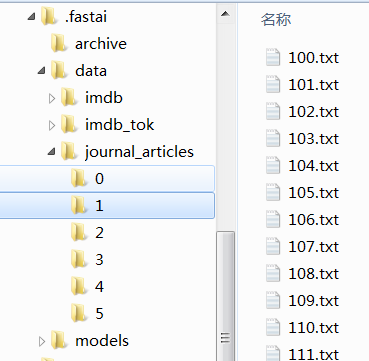

--------------------

## Train-Test Splitting

First, we need to settle down the random seeds. 

In [48]:
import tensorflow as tf

In [49]:
# Set the random seeds, to prevent from different results when each time running, and to control one 
# of the variables. 
import random
random.seed(15)
np.random.seed(15)
tf.random.set_seed(15)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# train:test ratio = 8:2. 
# Original string version sci_string_X, which is not lemmatized or removed stopwords
# sci_string_X data type: A list of 600 long strings
X_train_pre, X_test_pre, Y_train_pre, Y_test_pre = train_test_split(
    sci_string_X, sci_categories_target_Y, test_size=0.20, random_state=15)
# We set the random state in order to repeat the experiment later. 

In [52]:
len(X_train_pre)

480

In [53]:
# Regularised version of X, which is lemmatized and removed stopwords and characters
# sci_X_regularised_united data type: A list of 600 long strings
X_train_pre2, X_test_pre2, Y_train_pre2, Y_test_pre2 = train_test_split(
    sci_X_regularised_united, sci_categories_target_Y, test_size=0.20, random_state=15)

In [54]:
Y_train_pre2[70:80]

[0, 4, 0, 1, 0, 2, 1, 3, 2, 4]

## Feed data to Keras (Chollet Step 4)

### Original data

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [56]:
# Below codes are from https://github.com/codehax41/BBC-Text-Classification/blob/master/BBC%20using%20Keras.ipynb
num_words_input = 600 # We should set the max number of crucial words to be identified. 
# Notice that Keras does not input all of the texts. It only uses important words. 
tok = keras.preprocessing.text.Tokenizer(num_words=num_words_input, 
                                              lower=True,   # convert to lowercase
                                              char_level=False)
# The above process will filter default punctuations. 

tok.fit_on_texts(X_train_pre) # fit tokenizer to our training text data

X_train = tok.texts_to_matrix(X_train_pre)
X_test = tok.texts_to_matrix(X_test_pre)

In [57]:
np.shape(X_train[78])

(600,)

In [58]:
tok.word_index

{'the': 1,
 'of': 2,
 'and': 3,
 'in': 4,
 'to': 5,
 'a': 6,
 'for': 7,
 'is': 8,
 'with': 9,
 'that': 10,
 'as': 11,
 'by': 12,
 'were': 13,
 'cells': 14,
 'was': 15,
 'we': 16,
 'are': 17,
 'on': 18,
 'this': 19,
 'from': 20,
 'at': 21,
 'cell': 22,
 'be': 23,
 'fig': 24,
 'or': 25,
 'which': 26,
 'an': 27,
 '1': 28,
 'it': 29,
 'data': 30,
 'have': 31,
 'can': 32,
 'these': 33,
 'using': 34,
 'not': 35,
 't': 36,
 '2': 37,
 'also': 38,
 'more': 39,
 'has': 40,
 'between': 41,
 'used': 42,
 'their': 43,
 'time': 44,
 'all': 45,
 'two': 46,
 '0': 47,
 'study': 48,
 'our': 49,
 'but': 50,
 'such': 51,
 'one': 52,
 'i': 53,
 'been': 54,
 'each': 55,
 'into': 56,
 '3': 57,
 'other': 58,
 'model': 59,
 'than': 60,
 'different': 61,
 '5': 62,
 'they': 63,
 'analysis': 64,
 'quantum': 65,
 'after': 66,
 'based': 67,
 'expression': 68,
 'number': 69,
 'then': 70,
 'results': 71,
 'its': 72,
 '4': 73,
 'when': 74,
 'supplementary': 75,
 'high': 76,
 'only': 77,
 'well': 78,
 'both': 79,
 'fir

In [59]:
# This cell of codes is from: https://github.com/codehax41/BBC-Text-Classification/blob/master/BBC%20using%20Keras.ipynb
#Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(Y_train_pre)
Y_train = encoder.transform(Y_train_pre)
Y_test = encoder.transform(Y_test_pre)
# Converts the labels to a one-hot representation
num_classes = np.max(Y_train) + 1
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [60]:
Y_train[300]  # check. It should be a one-hot encoding array

array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [61]:
train_num = len(Y_train)
train_num

480

In [62]:
np.shape(X_train)

(480, 600)

In [63]:
np.shape(Y_train)

(480, 6)

### Cleansed data

In [64]:
# Below codes are from https://github.com/codehax41/BBC-Text-Classification/blob/master/BBC%20using%20Keras.ipynb

# Notice that Keras does not input all of the texts. It only uses important words. 
tok2 = keras.preprocessing.text.Tokenizer(num_words=num_words_input, 
                                              lower=True,   # convert to lowercase
                                              char_level=False)
# The above process will filter default punctuations. 

tok2.fit_on_texts(X_train_pre2) # fit tokenizer to our training text data

X_train2 = tok2.texts_to_matrix(X_train_pre2)
X_test2 = tok2.texts_to_matrix(X_test_pre2)

In [65]:
tok2.word_index

{'cell': 1,
 'use': 2,
 'fig': 3,
 '1': 4,
 'study': 5,
 'data': 6,
 'model': 7,
 '0': 8,
 'also': 9,
 'show': 10,
 "'s": 11,
 'result': 12,
 'time': 13,
 '2': 14,
 'state': 15,
 'one': 16,
 'find': 17,
 '5': 18,
 'two': 19,
 'group': 20,
 'system': 21,
 'sample': 22,
 'number': 23,
 'method': 24,
 'increase': 25,
 'include': 26,
 'different': 27,
 '3': 28,
 'quantum': 29,
 'analysis': 30,
 'process': 31,
 'change': 32,
 'structure': 33,
 '10': 34,
 '4': 35,
 'level': 36,
 'expression': 37,
 'effect': 38,
 'supplementary': 39,
 'population': 40,
 'gene': 41,
 'work': 42,
 'research': 43,
 'however': 44,
 'human': 45,
 'could': 46,
 'provide': 47,
 'first': 48,
 'may': 49,
 'al': 50,
 'function': 51,
 'set': 52,
 'follow': 53,
 'year': 54,
 'new': 55,
 'perform': 56,
 'protein': 57,
 'make': 58,
 'compare': 59,
 'phase': 60,
 'control': 61,
 'signal': 62,
 'value': 63,
 'type': 64,
 'flow': 65,
 'see': 66,
 'e': 67,
 'observe': 68,
 'test': 69,
 'base': 70,
 'et': 71,
 'b': 72,
 'sugges

In [66]:
# This cell of codes is from: https://github.com/codehax41/BBC-Text-Classification/blob/master/BBC%20using%20Keras.ipynb
#Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(Y_train_pre2)
Y_train2 = encoder.transform(Y_train_pre2)
Y_test2 = encoder.transform(Y_test_pre2)
# Converts the labels to a one-hot representation
num_classes2 = np.max(Y_train2) + 1
Y_train2 = keras.utils.to_categorical(Y_train2, num_classes)
Y_test2 = keras.utils.to_categorical(Y_test2, num_classes)

In [67]:
len(Y_test2)

120

In [68]:
type(X_train2)

numpy.ndarray

In [69]:
X_train2[56]  # check one

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [70]:
type(Y_train2)

numpy.ndarray

In [71]:
Y_train2[56] # check one

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [72]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [73]:
import matplotlib.pyplot as plt

## Test the data on a small model (Chollet Step 5)

In [82]:
# This cell of codes is from our lecture material, the lab REUTERS. 
from tensorflow.keras import models
from tensorflow.keras import layers

model_small = models.Sequential()
model_small.add(layers.Dense(16, activation = 'relu', input_shape = (num_words_input, ))) # input 600
model_small.add(layers.Dense(16, activation = 'relu'))
model_small.add(layers.Dense(6, activation = 'softmax'))
# Notice that for multi-class classification task, the last layer should choose 'softmax' as the 
# activation function. 

model_small.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              # Notice that the Chollet book emphasizes that 'categorical_crossentropy' is always used
              # because 'It minimizes the distance between the probability distributions output by 
              # the model and the true distribution of the targets'. 
              metrics = ['accuracy'])

In [83]:
# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
    X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_small = model_small.fit(X_train_partial2, 
                    Y_train_partial2,
                    batch_size=64,
                    epochs=8,  # we set a small epoch
                    validation_data=(X_val2, Y_val2))

Epoch 1/8
6/6 [==============================] - 1s 68ms/step - loss: 1.7867 - accuracy: 0.1875 - val_loss: 1.7098 - val_accuracy: 0.2708
Epoch 2/8
6/6 [==============================] - 0s 10ms/step - loss: 1.6607 - accuracy: 0.3151 - val_loss: 1.6419 - val_accuracy: 0.3333
Epoch 3/8
6/6 [==============================] - 0s 11ms/step - loss: 1.5810 - accuracy: 0.3984 - val_loss: 1.5702 - val_accuracy: 0.4167
Epoch 4/8
6/6 [==============================] - 0s 10ms/step - loss: 1.4939 - accuracy: 0.4870 - val_loss: 1.4933 - val_accuracy: 0.4583
Epoch 5/8
6/6 [==============================] - 0s 10ms/step - loss: 1.4084 - accuracy: 0.5286 - val_loss: 1.4451 - val_accuracy: 0.5000
Epoch 6/8
6/6 [==============================] - 0s 10ms/step - loss: 1.3210 - accuracy: 0.5911 - val_loss: 1.3912 - val_accuracy: 0.5208
Epoch 7/8
6/6 [==============================] - 0s 11ms/step - loss: 1.2426 - accuracy: 0.6432 - val_loss: 1.3319 - val_accuracy: 0.5208
Epoch 8/8
6/6 [===================

In [84]:
history_dict = history_small.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
import matplotlib.pyplot as plt

def draw_train_val_loss_plot(history):
    '''  Draw the train-validation loss curves
    
    Parameters: 
      history - the 'history' variable to fit the model. 
    
    Returns: 
      A plot. 
      
    Note: This cell of codes is from the lecture material, lab REUTERS. 
    '''
    history_dict = history.history
    
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


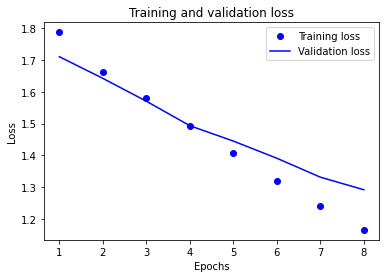

In [86]:
draw_train_val_loss_plot(history_small)

In [64]:
def draw_train_val_acc(history): 
    '''  Draw the train-validation accuracies curves
    
    Parameters: 
      history - the 'history' variable to fit the model. 
    
    Returns: 
      A plot. 
      
    Note: This cell of codes is from the lecture material, lab REUTERS. 
    '''
    plt.clf() # clear the previous plot
    
    history_dict = history.history

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, blue_dots, label = 'Training acc')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

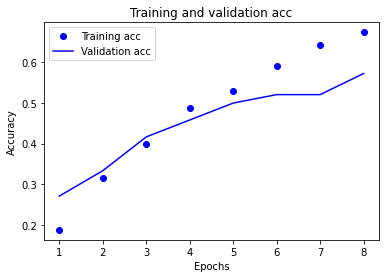

In [88]:
draw_train_val_acc(history_small)

In [89]:
# see the performance in the test set: 
results_small = model_small.evaluate(X_test2, Y_test2)
results_small

4/4 [==============================] - 0s 2ms/step - loss: 1.3714 - accuracy: 0.5000


[1.3714357614517212, 0.5]

In [90]:
pred = model_small.predict(X_test2)  # Let's get the predicted labels. 

4/4 [==============================] - 0s 2ms/step


In [91]:
pred_labels = np.argmax(pred, axis = 1)  # these are the predicted labels for the test set. 

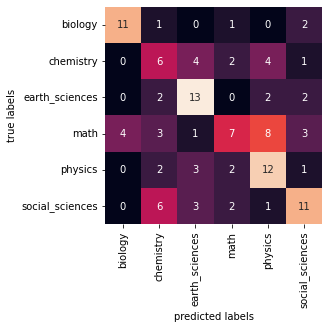

In [92]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_small = confusion_matrix(Y_test2.argmax(axis=1), pred_labels)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_small, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [93]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test2.argmax(axis=1), pred_labels, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.73      0.73      0.73        15
      chemistry       0.30      0.35      0.32        17
 earth_sciences       0.54      0.68      0.60        19
           math       0.50      0.27      0.35        26
        physics       0.44      0.60      0.51        20
social_sciences       0.55      0.48      0.51        23

       accuracy                           0.50       120
      macro avg       0.51      0.52      0.51       120
   weighted avg       0.51      0.50      0.49       120



(Oct 25) 
- We have already beaten the very basic baseline which should be 1/6 = 0.16667 with the precision/recall/F1 score of 0.5 of this small neural network. 

- We see that the recall scores for earth_sciences and social_sciences are really high, with over 0.8, which means that from all of our dataset, our previously written classifier can collect as complete as possible for these two categories. 

- For chemistry, as what I have predicted, it should be difficult to be discerned from biology. Thus, it has a low recall score, which means that from all of our dataset, our classifier can hardly collect all of the chemistry data. 

- It is a surprise for me that math also gets a low recall score, which means it cannot be fully collected. 

## Developing a model that overfits (Chollet Step 6)

In [67]:
# This cell of codes is from our lecture material, the lab REUTERS. 
from tensorflow.keras import models
from tensorflow.keras import layers

model_overfit = models.Sequential()
model_overfit.add(layers.Dense(16, activation = 'relu', input_shape = (num_words_input, ))) # input 600
model_overfit.add(layers.Dense(128, activation = 'relu'))
model_overfit.add(layers.Dense(256, activation = 'relu'))
model_overfit.add(layers.Dense(256, activation = 'relu'))
model_overfit.add(layers.Dense(16, activation = 'relu'))
model_overfit.add(layers.Dense(6, activation = 'softmax'))
# Notice that for multi-class classification task, the last layer should choose 'softmax' as the 
# activation function. 

model_overfit.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              # Notice that the Chollet book emphasizes that 'categorical_crossentropy' is always used
              # because 'It minimizes the distance between the probability distributions output by 
              # the model and the true distribution of the targets'. 
              metrics = ['accuracy'])

In [72]:
# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
    X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_overfit = model_overfit.fit(X_train_partial2, 
                    Y_train_partial2,
                    batch_size=64,
                    epochs=200,  # we set a small epoch
                    validation_data=(X_val2, Y_val2))

Epoch 1/200
6/6 [==============================] - 0s 20ms/step - loss: 0.0390 - accuracy: 0.9740 - val_loss: 3.8653 - val_accuracy: 0.5729
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.9661 - val_loss: 3.9605 - val_accuracy: 0.5729
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0396 - accuracy: 0.9688 - val_loss: 4.0371 - val_accuracy: 0.5833
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0398 - accuracy: 0.9609 - val_loss: 4.1201 - val_accuracy: 0.5833
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0389 - accuracy: 0.9635 - val_loss: 4.1309 - val_accuracy: 0.5729
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.9557 - val_loss: 4.2780 - val_accuracy: 0.5729
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9688 - val_loss: 4.1966 - val_accuracy: 0.5625
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 17ms/step - loss: 0.0392 - accuracy: 0.9714 - val_loss: 6.6982 - val_accuracy: 0.5729
Epoch 118/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9635 - val_loss: 6.7967 - val_accuracy: 0.5625
Epoch 119/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0388 - accuracy: 0.9714 - val_loss: 6.7655 - val_accuracy: 0.5729
Epoch 120/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0389 - accuracy: 0.9635 - val_loss: 6.6478 - val_accuracy: 0.5729
Epoch 121/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0390 - accuracy: 0.9661 - val_loss: 6.9451 - val_accuracy: 0.5729
Epoch 122/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9635 - val_loss: 7.3931 - val_accuracy: 0.5833
Epoch 123/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0406 - accuracy: 0.9661 - val_loss: 6.4873 - val_accuracy: 0.5625
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0558 - accuracy: 0.9661 - val_loss: 8.4904 - val_accuracy: 0.5729
Epoch 176/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0387 - accuracy: 0.9635 - val_loss: 9.4364 - val_accuracy: 0.5729
Epoch 177/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0389 - accuracy: 0.9661 - val_loss: 8.5215 - val_accuracy: 0.5938
Epoch 178/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0416 - accuracy: 0.9661 - val_loss: 10.2776 - val_accuracy: 0.5521
Epoch 179/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9609 - val_loss: 10.1772 - val_accuracy: 0.5938
Epoch 180/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.9688 - val_loss: 10.1698 - val_accuracy: 0.5312
Epoch 181/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0385 - accuracy: 0.9714 - val_loss: 8.0056 - val_accuracy: 0.6250
Epoc

In [73]:
history_dict = history_overfit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

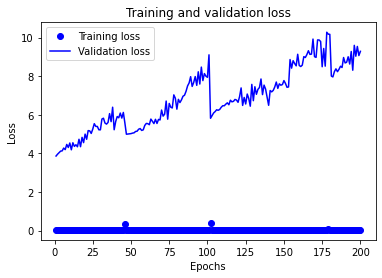

In [74]:
draw_train_val_loss_plot(history_overfit)

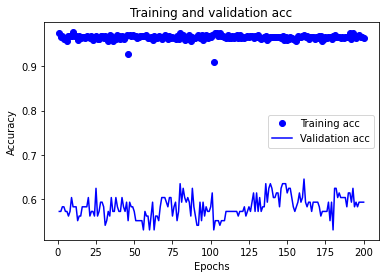

In [76]:
draw_train_val_acc(history_overfit)

In [77]:
# see the performance in the test set: 
results_overfit = model_overfit.evaluate(X_test2, Y_test2)
results_overfit

4/4 [==============================] - 0s 2ms/step - loss: 7.7050 - accuracy: 0.6083


[7.705035209655762, 0.6083333492279053]

In [79]:
pred_overfit = model_overfit.predict(X_test2)  # Let's get the predicted labels. 
pred_labels_overfit = np.argmax(pred_overfit, axis = 1)  # these are the predicted labels for the test set. 

4/4 [==============================] - 0s 2ms/step


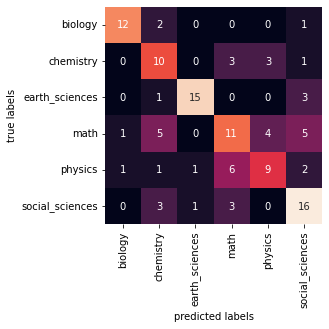

In [80]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_overfit = confusion_matrix(Y_test2.argmax(axis=1), pred_labels_overfit)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_overfit, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [81]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test2.argmax(axis=1), pred_labels_overfit, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.86      0.80      0.83        15
      chemistry       0.45      0.59      0.51        17
 earth_sciences       0.88      0.79      0.83        19
           math       0.48      0.42      0.45        26
        physics       0.56      0.45      0.50        20
social_sciences       0.57      0.70      0.63        23

       accuracy                           0.61       120
      macro avg       0.63      0.62      0.63       120
   weighted avg       0.62      0.61      0.61       120



## Controlled experiments & hyperparameter discussions (Chollet Step 7)

### Controlled experiment - batch size

In [83]:
# control experiment for the batch size 
def exp_batch_size(input_batch_size, words, neuron, activation, random_state): 
    '''  Controlled Experiment - Batch size
    
    Parameters: 
      input_batch_size - the batch size we want to set and want to see the results. 
      words - the number of words for the input_shape. 
      neuron - the number of neurons in each layer, in integer type. 
      activation - the activation function in string type. 
      random_state - the random state we need to make a record, in order to repeat the experiment. 
    
    Returns: 
      A list including 'results' list, and 'history' variable. 
      The 'results' contains the loss and accuracy. 
    
    '''
    # train the model: 
    model = models.Sequential()
    # just pick any parameters here to control the other variables: 
    model.add(layers.Dense(neuron, activation = activation, input_shape = (words,)))
    model.add(layers.Dense(neuron, activation = activation))
    model.add(layers.Dense(6, activation = 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # train-validation splitting: 
    # this time I use the cleansed dataset
    X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=random_state)  
    # we set a random state in order to repeat the experiment later

    history = model.fit(X_train_partial2, 
                        Y_train_partial2,
                        batch_size=input_batch_size, # input the batch size we want to set
                        epochs=20,  # we just set any fixed number for control
                        validation_data=(X_val2, Y_val2))

    # use this model to evaluate the test set and show the results [loss, accuracy]: 
    results = model.evaluate(X_test2, Y_test2)
    combine = [results, history]
    
    # return the results list, and the useful 'history' variable to later draw plots: 
    return combine

In [89]:
[return1, return2] = exp_batch_size(1024, 600, 64, 'relu', 15)
return1

Epoch 1/20
1/1 [==============================] - 1s 672ms/step - loss: 1.8911 - accuracy: 0.1667 - val_loss: 1.7172 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 1.7119 - accuracy: 0.2865 - val_loss: 1.6249 - val_accuracy: 0.3750
Epoch 3/20
1/1 [==============================] - 0s 47ms/step - loss: 1.5799 - accuracy: 0.4219 - val_loss: 1.5508 - val_accuracy: 0.4896
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 1.4581 - accuracy: 0.5547 - val_loss: 1.4740 - val_accuracy: 0.4896
Epoch 5/20
1/1 [==============================] - 0s 45ms/step - loss: 1.3488 - accuracy: 0.6120 - val_loss: 1.4471 - val_accuracy: 0.5417
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 1.2586 - accuracy: 0.6927 - val_loss: 1.3561 - val_accuracy: 0.5208
Epoch 7/20
1/1 [==============================] - 0s 49ms/step - loss: 1.1945 - accuracy: 0.6589 - val_loss: 1.4244 - val_accuracy: 0.4896
Epoch 8/20
1/1 [==========

[1.1341681480407715, 0.5666666626930237]

In [84]:
[return1, return2] = exp_batch_size(512, 600, 64, 'relu', 15)
return1

Epoch 1/20
1/1 [==============================] - 1s 888ms/step - loss: 1.8395 - accuracy: 0.1484 - val_loss: 1.7182 - val_accuracy: 0.3125
Epoch 2/20
1/1 [==============================] - 0s 44ms/step - loss: 1.6756 - accuracy: 0.3438 - val_loss: 1.6549 - val_accuracy: 0.3750
Epoch 3/20
1/1 [==============================] - 0s 43ms/step - loss: 1.5566 - accuracy: 0.5182 - val_loss: 1.5787 - val_accuracy: 0.3958
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 1.4456 - accuracy: 0.5495 - val_loss: 1.5236 - val_accuracy: 0.4479
Epoch 5/20
1/1 [==============================] - 0s 43ms/step - loss: 1.3529 - accuracy: 0.6068 - val_loss: 1.4739 - val_accuracy: 0.5104
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 1.2819 - accuracy: 0.6328 - val_loss: 1.4399 - val_accuracy: 0.4479
Epoch 7/20
1/1 [==============================] - 0s 53ms/step - loss: 1.2113 - accuracy: 0.6432 - val_loss: 1.3777 - val_accuracy: 0.5312
Epoch 8/20
1/1 [==========

[1.1667447090148926, 0.574999988079071]

In [85]:
[return1, return2] = exp_batch_size(256, 600, 64, 'relu', 15)
return1

Epoch 1/20
2/2 [==============================] - 1s 213ms/step - loss: 1.8729 - accuracy: 0.1771 - val_loss: 1.7548 - val_accuracy: 0.3021
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 1.6004 - accuracy: 0.4375 - val_loss: 1.6214 - val_accuracy: 0.3958
Epoch 3/20
2/2 [==============================] - 0s 35ms/step - loss: 1.4579 - accuracy: 0.5182 - val_loss: 1.5045 - val_accuracy: 0.4375
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 1.3039 - accuracy: 0.5833 - val_loss: 1.4011 - val_accuracy: 0.4792
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 1.1700 - accuracy: 0.6849 - val_loss: 1.3697 - val_accuracy: 0.4583
Epoch 6/20
2/2 [==============================] - 0s 33ms/step - loss: 1.0738 - accuracy: 0.6771 - val_loss: 1.2958 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.9602 - accuracy: 0.7292 - val_loss: 1.2587 - val_accuracy: 0.5208
Epoch 8/20
2/2 [==========

[1.083611011505127, 0.625]

In [86]:
[return1, return2] = exp_batch_size(128, 600, 64, 'relu', 15)
return1

Epoch 1/20
3/3 [==============================] - 1s 101ms/step - loss: 1.7245 - accuracy: 0.2708 - val_loss: 1.6082 - val_accuracy: 0.3542
Epoch 2/20
3/3 [==============================] - 0s 21ms/step - loss: 1.4006 - accuracy: 0.5312 - val_loss: 1.4491 - val_accuracy: 0.3854
Epoch 3/20
3/3 [==============================] - 0s 23ms/step - loss: 1.2194 - accuracy: 0.6458 - val_loss: 1.2782 - val_accuracy: 0.4583
Epoch 4/20
3/3 [==============================] - 0s 21ms/step - loss: 1.0601 - accuracy: 0.7083 - val_loss: 1.2278 - val_accuracy: 0.5521
Epoch 5/20
3/3 [==============================] - 0s 23ms/step - loss: 0.9509 - accuracy: 0.7500 - val_loss: 1.2106 - val_accuracy: 0.5625
Epoch 6/20
3/3 [==============================] - 0s 23ms/step - loss: 0.8528 - accuracy: 0.7734 - val_loss: 1.1360 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 0s 21ms/step - loss: 0.7470 - accuracy: 0.8229 - val_loss: 1.1686 - val_accuracy: 0.5938
Epoch 8/20
3/3 [==========

[1.0604711771011353, 0.6333333253860474]

In [87]:
[return1, return2] = exp_batch_size(64, 600, 64, 'relu', 15)
return1

Epoch 1/20
6/6 [==============================] - 1s 36ms/step - loss: 1.6607 - accuracy: 0.3203 - val_loss: 1.4466 - val_accuracy: 0.5104
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 1.2890 - accuracy: 0.5547 - val_loss: 1.2530 - val_accuracy: 0.6042
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 1.0789 - accuracy: 0.6901 - val_loss: 1.1262 - val_accuracy: 0.6146
Epoch 4/20
6/6 [==============================] - 0s 12ms/step - loss: 0.9092 - accuracy: 0.7266 - val_loss: 1.0665 - val_accuracy: 0.6458
Epoch 5/20
6/6 [==============================] - 0s 10ms/step - loss: 0.7845 - accuracy: 0.8073 - val_loss: 1.0214 - val_accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 0.6642 - accuracy: 0.8229 - val_loss: 0.9928 - val_accuracy: 0.6458
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.5665 - accuracy: 0.8802 - val_loss: 1.0430 - val_accuracy: 0.6042
Epoch 8/20
6/6 [============

[1.1273462772369385, 0.675000011920929]

In [88]:
[return1, return2] = exp_batch_size(32, 600, 64, 'relu', 15)
return1

Epoch 1/20
12/12 [==============================] - 1s 20ms/step - loss: 1.6864 - accuracy: 0.2917 - val_loss: 1.5128 - val_accuracy: 0.4271
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 1.3035 - accuracy: 0.5964 - val_loss: 1.2722 - val_accuracy: 0.5417
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 1.0413 - accuracy: 0.6953 - val_loss: 1.1428 - val_accuracy: 0.5312
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8653 - accuracy: 0.7708 - val_loss: 1.0893 - val_accuracy: 0.5729
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7081 - accuracy: 0.8151 - val_loss: 1.0218 - val_accuracy: 0.5938
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.5723 - accuracy: 0.8802 - val_loss: 1.0435 - val_accuracy: 0.6042
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.4698 - accuracy: 0.9141 - val_loss: 1.0222 - val_accuracy: 0.6562
Epoch 8/20
12/12 [=

[1.245298981666565, 0.625]

In [90]:
[return1, return2] = exp_batch_size(512, 600, 16, 'relu', 15)
return1

Epoch 1/20
1/1 [==============================] - 1s 678ms/step - loss: 1.8517 - accuracy: 0.1745 - val_loss: 1.8120 - val_accuracy: 0.1250
Epoch 2/20
1/1 [==============================] - 0s 41ms/step - loss: 1.7717 - accuracy: 0.1953 - val_loss: 1.7931 - val_accuracy: 0.1354
Epoch 3/20
1/1 [==============================] - 0s 44ms/step - loss: 1.7279 - accuracy: 0.2370 - val_loss: 1.7673 - val_accuracy: 0.1771
Epoch 4/20
1/1 [==============================] - 0s 42ms/step - loss: 1.6906 - accuracy: 0.2786 - val_loss: 1.7473 - val_accuracy: 0.1875
Epoch 5/20
1/1 [==============================] - 0s 43ms/step - loss: 1.6575 - accuracy: 0.3229 - val_loss: 1.7073 - val_accuracy: 0.2188
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 1.6237 - accuracy: 0.3776 - val_loss: 1.6948 - val_accuracy: 0.2188
Epoch 7/20
1/1 [==============================] - 0s 48ms/step - loss: 1.5891 - accuracy: 0.3776 - val_loss: 1.6460 - val_accuracy: 0.2917
Epoch 8/20
1/1 [==========

[1.3784019947052002, 0.550000011920929]

### Controlled experiment - number of layers

In [74]:
# control experiment for the number of layers
def exp_num_layers(num_layers_inner, batch_size, words, neuron, activation, random_state): 
    '''  Controlled Experiment - Number of Layers
    
    Parameters: 
      num_layers_inner - the number of inner layers. 
      batch_size - the batch size we want to set. 
      words - the number of words for the input_shape. 
      neuron - the number of neurons in each layer, in integer type. 
      activation - the activation function in string type. 
      random_state - the random state we need to make a record, in order to repeat the experiment. 
    
    Returns: 
      A list including 'results' list, and 'history' variable. 
      The 'results' contains the loss and accuracy. 
    
    '''
    # train the model: 
    model = models.Sequential()
    # just pick any parameters here to control the other variables: 
    model.add(layers.Dense(neuron, activation = 'relu', input_shape = (words,)))
    
    # the inner layers we need to control and test: 
    i = 0
    while i < num_layers_inner: 
        model.add(layers.Dense(neuron, activation = activation))  # note we can change the settings
        i+=1
        
    # the last layer: 
    model.add(layers.Dense(6, activation = 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # train-validation splitting: 
    # this time I use the cleansed dataset
    X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=random_state)  
    # we set a random state in order to repeat the experiment later

    history = model.fit(X_train_partial2, 
                        Y_train_partial2,
                        batch_size=batch_size, # input the batch size we want to set
                        epochs=20,  # we just set any fixed number for control
                        validation_data=(X_val2, Y_val2))

    # use this model to evaluate the test set and show the results [loss, accuracy]: 
    results = model.evaluate(X_test2, Y_test2)
    combine = [results, history]
    
    # return the results list, and the useful 'history' variable to later draw plots: 
    return combine

In [75]:
# Feb 03
result = []
for i in range(0, 7): 
    a = exp_num_layers(i, 64, 600, 256, 'relu', 15)
    result.append(a[0])
print(result)

Epoch 1/20
6/6 [==============================] - 0s 31ms/step - loss: 1.7410 - accuracy: 0.3125 - val_loss: 1.4840 - val_accuracy: 0.4583
Epoch 2/20
6/6 [==============================] - 0s 9ms/step - loss: 1.1123 - accuracy: 0.6719 - val_loss: 1.1753 - val_accuracy: 0.6146
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 0.8672 - accuracy: 0.7839 - val_loss: 1.0660 - val_accuracy: 0.6354
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.8698 - val_loss: 1.0446 - val_accuracy: 0.6250
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 0.5535 - accuracy: 0.9010 - val_loss: 0.9750 - val_accuracy: 0.6562
Epoch 6/20
6/6 [==============================] - 0s 12ms/step - loss: 0.4400 - accuracy: 0.9453 - val_loss: 0.9471 - val_accuracy: 0.6667
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 0.3643 - accuracy: 0.9505 - val_loss: 1.0098 - val_accuracy: 0.6146
Epoch 8/20
6/6 [================

Epoch 19/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0925 - accuracy: 0.9583 - val_loss: 1.3331 - val_accuracy: 0.6250
Epoch 20/20
4/4 [==============================] - 0s 2ms/step - loss: 1.2297 - accuracy: 0.6833
Epoch 1/20
6/6 [==============================] - 1s 28ms/step - loss: 1.7332 - accuracy: 0.2448 - val_loss: 1.6915 - val_accuracy: 0.3125
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 1.4040 - accuracy: 0.4974 - val_loss: 1.2821 - val_accuracy: 0.4583
Epoch 3/20
6/6 [==============================] - 0s 11ms/step - loss: 0.9818 - accuracy: 0.6953 - val_loss: 1.2997 - val_accuracy: 0.5625
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 0.7688 - accuracy: 0.7318 - val_loss: 1.1096 - val_accuracy: 0.5833
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6419 - accuracy: 0.8099 - val_loss: 1.3456 - val_accuracy: 0.5521
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 0.

In [76]:
# Feb 03
result2 = []
for i in range(0, 7): 
    a = exp_num_layers(i, 256, 600, 128, 'relu', 15)
    result2.append(a[0])
print(result2)

Epoch 1/20
2/2 [==============================] - 0s 125ms/step - loss: 1.8085 - accuracy: 0.2266 - val_loss: 1.6367 - val_accuracy: 0.4062
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 1.4110 - accuracy: 0.5052 - val_loss: 1.3624 - val_accuracy: 0.5104
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 1.1711 - accuracy: 0.6432 - val_loss: 1.2552 - val_accuracy: 0.5938
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 1.0384 - accuracy: 0.7109 - val_loss: 1.2053 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 0.9132 - accuracy: 0.7760 - val_loss: 1.1730 - val_accuracy: 0.5833
Epoch 6/20
2/2 [==============================] - 0s 25ms/step - loss: 0.8384 - accuracy: 0.7995 - val_loss: 1.1369 - val_accuracy: 0.6146
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 0.7382 - accuracy: 0.8490 - val_loss: 1.1119 - val_accuracy: 0.6250
Epoch 8/20
2/2 [==========

Epoch 15/20
2/2 [==============================] - 0s 24ms/step - loss: 0.5323 - accuracy: 0.8724 - val_loss: 1.0233 - val_accuracy: 0.5938
Epoch 16/20
2/2 [==============================] - 0s 24ms/step - loss: 0.4580 - accuracy: 0.8854 - val_loss: 1.0149 - val_accuracy: 0.6146
Epoch 17/20
2/2 [==============================] - 0s 24ms/step - loss: 0.4490 - accuracy: 0.8542 - val_loss: 1.0233 - val_accuracy: 0.6146
Epoch 18/20
2/2 [==============================] - 0s 26ms/step - loss: 0.4090 - accuracy: 0.8698 - val_loss: 1.0782 - val_accuracy: 0.5625
Epoch 19/20
2/2 [==============================] - 0s 24ms/step - loss: 0.5394 - accuracy: 0.8333 - val_loss: 1.3384 - val_accuracy: 0.5208
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 1.0963 - accuracy: 0.6000
Epoch 1/20
2/2 [==============================] - 1s 138ms/step - loss: 1.7881 - accuracy: 0.1797 - val_loss: 1.7624 - val_accuracy: 0.3229
Epoch 2/20
2/2 [==============================] - 0s 30ms/step 

In [77]:
# Feb 03
result3 = []
for i in range(0, 7): 
    a = exp_num_layers(i, 128, 600, 128, 'relu', 15)
    result3.append(a[0])
print(result3)

Epoch 1/20
3/3 [==============================] - 0s 54ms/step - loss: 1.7335 - accuracy: 0.2578 - val_loss: 1.5959 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 1.3166 - accuracy: 0.5208 - val_loss: 1.3422 - val_accuracy: 0.5417
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 1.0934 - accuracy: 0.6849 - val_loss: 1.2277 - val_accuracy: 0.5729
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 0.9351 - accuracy: 0.7708 - val_loss: 1.1489 - val_accuracy: 0.6146
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 0.8535 - accuracy: 0.7760 - val_loss: 1.1622 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 0.7365 - accuracy: 0.8229 - val_loss: 1.0798 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 0s 15ms/step - loss: 0.6484 - accuracy: 0.8672 - val_loss: 1.1047 - val_accuracy: 0.6354
Epoch 8/20
3/3 [===========

Epoch 15/20
3/3 [==============================] - 0s 25ms/step - loss: 0.3554 - accuracy: 0.9036 - val_loss: 1.2204 - val_accuracy: 0.6354
Epoch 16/20
3/3 [==============================] - 0s 15ms/step - loss: 0.3667 - accuracy: 0.8958 - val_loss: 0.9724 - val_accuracy: 0.5938
Epoch 17/20
3/3 [==============================] - 0s 16ms/step - loss: 0.1923 - accuracy: 0.9583 - val_loss: 1.0368 - val_accuracy: 0.6250
Epoch 18/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1709 - accuracy: 0.9609 - val_loss: 1.1455 - val_accuracy: 0.6458
Epoch 19/20
3/3 [==============================] - 0s 15ms/step - loss: 0.1370 - accuracy: 0.9609 - val_loss: 1.5706 - val_accuracy: 0.6042
Epoch 20/20
4/4 [==============================] - 0s 2ms/step - loss: 1.3731 - accuracy: 0.6000
Epoch 1/20
3/3 [==============================] - 1s 74ms/step - loss: 1.7842 - accuracy: 0.2057 - val_loss: 1.7437 - val_accuracy: 0.3854
Epoch 2/20
3/3 [==============================] - 0s 21ms/step -

### Controlled experiment - activation functions

In [89]:
# control experiment for the number of layers
def exp_act_func(act_list, num_layers_inner, batch_size, neuron, words, random_state): 
    '''  Controlled Experiment - Activation Functions
    
    Parameters: 
      act_list - a list of strings which are the activation functions. ['relu', 'relu', 'softmax']
      num_layers_inner - the number of inner layers. 
      batch_size - the batch size we want to set. 
      words - the number of words for the input_shape. 
      neuron - the number of neurons in each layer, in integer type.  
      random_state - the random state we need to make a record, in order to repeat the experiment. 
    
    Returns: 
      A list including 'results' list, and 'history' variable. 
      The 'results' contains the loss and accuracy. 
    
    '''
    if len(act_list) != (num_layers_inner + 2): 
        print("You have to enter a matching activation function list and the number of inner layers. Check again. ")
    elif len(act_list) < 2: 
        print("You must have at least 2 layers; that's to say, you must have 2 activation functions. ")
    else: 
        # train the model: 
        model = models.Sequential()

        # just pick any parameters here to control the other variables: 
        model.add(layers.Dense(64, activation = act_list[0], input_shape = (words,)))  # the first element in act_list

        # the inner layers we need to control and test: 
        i = 0
        while i < num_layers_inner: 
            model.add(layers.Dense(neuron, activation = act_list[i+1]))  # add the 2nd element and more
            i+=1

        # the last layer: 
        model.add(layers.Dense(6, activation = act_list[-1]))  # the last element in act_list
        model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # train-validation splitting: 
        # this time I use the cleansed dataset
        X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
            X_train2, Y_train2, test_size=0.20, random_state=random_state)  
        # we set a random state in order to repeat the experiment later

        history = model.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=batch_size, # input the batch size we want to set
                            epochs=20,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

        # use this model to evaluate the test set and show the results [loss, accuracy]: 
        results = model.evaluate(X_test2, Y_test2)
        combine = [results, history]

        # return the results list, and the useful 'history' variable to later draw plots: 
        return combine

In [90]:
# all the types of activation functions I can think of: 
all_act_list = ['relu', 'softmax', 'sigmoid', 'tanh', 'selu', 'softsign', 'hard_sigmoid', 'exponential']

In [92]:
# Feb 03
# First, we test the case of 3 layers in total, and we only have the experimental variable of the middle layer: 
act_result = []
for each in all_act_list: 
    input_list = ['relu', each, 'softmax']
    act_result.append(exp_act_func(act_list = input_list, 
                                   num_layers_inner = 1, 
                                   batch_size = 128, 
                                   neuron = 128, 
                                   words = 600, 
                                   random_state = 15)[0])
act_result

Train on 384 samples, validate on 96 samples
Epoch 1/20
384/384 [==============================] - 0s 543us/sample - loss: 1.7917 - accuracy: 0.2083 - val_loss: 1.6322 - val_accuracy: 0.4375
Epoch 2/20
384/384 [==============================] - 0s 23us/sample - loss: 1.5119 - accuracy: 0.5156 - val_loss: 1.4517 - val_accuracy: 0.5104
Epoch 3/20
384/384 [==============================] - 0s 23us/sample - loss: 1.2963 - accuracy: 0.6328 - val_loss: 1.3320 - val_accuracy: 0.5312
Epoch 4/20
384/384 [==============================] - 0s 21us/sample - loss: 1.1279 - accuracy: 0.6901 - val_loss: 1.2335 - val_accuracy: 0.5833
Epoch 5/20
384/384 [==============================] - 0s 21us/sample - loss: 0.9915 - accuracy: 0.7604 - val_loss: 1.1860 - val_accuracy: 0.5938
Epoch 6/20
384/384 [==============================] - 0s 29us/sample - loss: 0.9002 - accuracy: 0.7656 - val_loss: 1.1825 - val_accuracy: 0.6042
Epoch 7/20
384/384 [==============================] - 0s 21us/sample - loss: 0.7944 

384/384 [==============================] - 0s 23us/sample - loss: 0.4926 - accuracy: 0.9323 - val_loss: 1.0036 - val_accuracy: 0.6562
Epoch 12/20
384/384 [==============================] - 0s 18us/sample - loss: 0.4410 - accuracy: 0.9349 - val_loss: 1.0016 - val_accuracy: 0.6771
Epoch 13/20
384/384 [==============================] - 0s 21us/sample - loss: 0.3951 - accuracy: 0.9427 - val_loss: 1.0080 - val_accuracy: 0.6562
Epoch 14/20
384/384 [==============================] - 0s 23us/sample - loss: 0.3543 - accuracy: 0.9557 - val_loss: 1.0505 - val_accuracy: 0.6458
Epoch 15/20
384/384 [==============================] - 0s 21us/sample - loss: 0.3114 - accuracy: 0.9609 - val_loss: 1.0549 - val_accuracy: 0.6562
Epoch 16/20
384/384 [==============================] - 0s 21us/sample - loss: 0.3026 - accuracy: 0.9609 - val_loss: 0.9916 - val_accuracy: 0.6562
Epoch 17/20
384/384 [==============================] - 0s 21us/sample - loss: 0.2564 - accuracy: 0.9609 - val_loss: 1.0130 - val_accurac

[[1.0465116818745932, 0.65],
 [1.6607657194137573, 0.49166667],
 [0.9671117067337036, 0.675],
 [1.1139755964279174, 0.6333333],
 [1.0172423601150513, 0.6666667],
 [0.9269145607948304, 0.68333334],
 [0.9540115276972453, 0.69166666],
 [1.493983308474223, 0.6666667]]

(Feb 03) It seems that relu-hard_sigmoid-softmax has the highest accuracy with 0.69; relu-softsign-softmax also performs well with 0.68; if we put softmax inside the middle layer, we get low accuracy; relu-sigmoid-softmax performs also rather high, with accuracy of 0.675. 

In [93]:
# Feb 03
# then, we test the case of 4 layers in total, and we change the middle 2 layers as having the same act func: 
act_result2 = []
for each in all_act_list: 
    input_list = ['relu', each, each, 'softmax']
    act_result2.append(exp_act_func(act_list = input_list, 
                                   num_layers_inner = 2, 
                                   batch_size = 128, 
                                   neuron = 128, 
                                   words = 600, 
                                   random_state = 15)[0])
act_result2

Train on 384 samples, validate on 96 samples
Epoch 1/20
384/384 [==============================] - 0s 787us/sample - loss: 1.7546 - accuracy: 0.2682 - val_loss: 1.5732 - val_accuracy: 0.3958
Epoch 2/20
384/384 [==============================] - 0s 41us/sample - loss: 1.5357 - accuracy: 0.4401 - val_loss: 1.5072 - val_accuracy: 0.3854
Epoch 3/20
384/384 [==============================] - 0s 43us/sample - loss: 1.3467 - accuracy: 0.5729 - val_loss: 1.3311 - val_accuracy: 0.4583
Epoch 4/20
384/384 [==============================] - 0s 23us/sample - loss: 1.1568 - accuracy: 0.6771 - val_loss: 1.2262 - val_accuracy: 0.5729
Epoch 5/20
384/384 [==============================] - 0s 31us/sample - loss: 0.9649 - accuracy: 0.7552 - val_loss: 1.2081 - val_accuracy: 0.5417
Epoch 6/20
384/384 [==============================] - 0s 23us/sample - loss: 0.8880 - accuracy: 0.7240 - val_loss: 1.1970 - val_accuracy: 0.5625
Epoch 7/20
384/384 [==============================] - 0s 29us/sample - loss: 0.8026 

Epoch 12/20
384/384 [==============================] - 0s 41us/sample - loss: 0.2805 - accuracy: 0.9557 - val_loss: 0.9931 - val_accuracy: 0.6250
Epoch 13/20
384/384 [==============================] - 0s 0s/sample - loss: 0.2340 - accuracy: 0.9557 - val_loss: 0.9998 - val_accuracy: 0.6354
Epoch 14/20
384/384 [==============================] - 0s 0s/sample - loss: 0.1968 - accuracy: 0.9688 - val_loss: 1.0598 - val_accuracy: 0.6250
Epoch 15/20
384/384 [==============================] - 0s 41us/sample - loss: 0.1676 - accuracy: 0.9688 - val_loss: 1.0799 - val_accuracy: 0.6458
Epoch 16/20
384/384 [==============================] - 0s 41us/sample - loss: 0.1577 - accuracy: 0.9688 - val_loss: 1.0620 - val_accuracy: 0.6250
Epoch 17/20
384/384 [==============================] - 0s 41us/sample - loss: 0.1312 - accuracy: 0.9688 - val_loss: 1.0989 - val_accuracy: 0.6146
Epoch 18/20
384/384 [==============================] - 0s 41us/sample - loss: 0.1214 - accuracy: 0.9688 - val_loss: 1.1878 - val

[[1.0755352258682251, 0.625],
 [1.7877373139063517, 0.29166666],
 [1.104865050315857, 0.6166667],
 [1.0579676866531371, 0.6666667],
 [1.2318978706995647, 0.64166665],
 [1.1883386691411337, 0.625],
 [1.1228162209192911, 0.6333333],
 [1.981887149810791, 0.55833334]]

(Feb 03) This time, relu-tanh-tanh-softmax wins with accuracy=0.6667. Also, softmax cannot be put inside inner layers, as this time we have relu-softmax-softmax-softmax with accuracy=0.29. Selu also perfoms well. 

### Controlled experiment - neuron numbers

In [94]:
def exp_neuron_nums(neuron, act_list, batch_size, words, random_state): 
    '''  Controlled Experiment - Neuron Numbers
    
    Parameters: 
      neuron - a list of neuron numbers for each layer, starting from the first layer, 
              to the end of inner layer. The number of the output layer does not need to be settled. 
              e.g. [64, 128, 32]
      act_list - a list of strings which are the activation functions. ['relu', 'relu', 'softmax'] 
      batch_size - the batch size we want to set. 
      words - the number of words for the input_shape. 
      random_state - the random state we need to make a record, in order to repeat the experiment. 
    
    Returns: 
      A list including 'results' list, and 'history' variable. 
      The 'results' contains the loss and accuracy. 
    
    '''
    if len(act_list) != len(neuron)+1: 
        print("Check your act_list length and neuron length. They must be equal. Should be: len(act_list) == len(neuron)+1")
    else: 
        # train the model: 
        model = models.Sequential()
        # the first input layer: 
        model.add(layers.Dense(neuron[0], activation = act_list[0], input_shape = (words,)))
        # the inner layers: 
        for i in range(1, len(neuron)): 
            model.add(layers.Dense(neuron[i], activation = act_list[i]))

        # the output layer: 
        model.add(layers.Dense(6, activation = act_list[-1]))
        model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # train-validation splitting: 
        X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
            X_train2, Y_train2, test_size=0.20, random_state=random_state)  
        # we set a random state in order to repeat the experiment later

        history = model.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=512, # set a fixed batch size
                            epochs=15,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

        # use this model to evaluate the test set and show the results [loss, accuracy]: 
        results = model.evaluate(X_test2, Y_test2)
        combine = [results, history]

        # return the results list, and the useful 'history' variable to later draw plots: 
        return combine

In [95]:
numneu_result = []
# to avoid bottleneck effect, we must gradually decrease the neuron numbers in later layers: 
loop_list = [[32, 32, 32], 
             [32, 64, 64],
             [64, 64, 64], 
             [64, 64, 32],
             [64, 128, 128], 
             [64, 128, 64], 
             [128, 128, 256], 
             [128, 128, 128], 
             [128, 128, 64],
             [128, 256, 128],
             [128, 256, 64],
             [512, 256, 128],
             [512, 512, 256], 
             [512, 1024, 512], 
             [1024, 1024, 512], 
             [1024, 512, 256], 
             [1024, 512, 128]
            ]
act_list = ['relu', 'tanh', 'tanh', 'softmax']

In [96]:
# Feb 03
for each_neu_list in loop_list: 
    numneu_result.append(exp_neuron_nums(neuron = each_neu_list, 
                                      act_list = act_list, 
                                      batch_size = 128, 
                                      words = 600, 
                                      random_state = 15)[0])
numneu_result

Train on 384 samples, validate on 96 samples
Epoch 1/15
384/384 [==============================] - 0s 1ms/sample - loss: 1.8626 - accuracy: 0.1641 - val_loss: 1.7471 - val_accuracy: 0.2396
Epoch 2/15
384/384 [==============================] - 0s 16us/sample - loss: 1.7454 - accuracy: 0.2526 - val_loss: 1.6881 - val_accuracy: 0.2292
Epoch 3/15
384/384 [==============================] - 0s 18us/sample - loss: 1.6509 - accuracy: 0.3281 - val_loss: 1.6478 - val_accuracy: 0.3333
Epoch 4/15
384/384 [==============================] - 0s 18us/sample - loss: 1.5795 - accuracy: 0.4531 - val_loss: 1.6042 - val_accuracy: 0.3542
Epoch 5/15
384/384 [==============================] - 0s 18us/sample - loss: 1.5130 - accuracy: 0.5052 - val_loss: 1.5755 - val_accuracy: 0.3958
Epoch 6/15
384/384 [==============================] - 0s 21us/sample - loss: 1.4557 - accuracy: 0.5312 - val_loss: 1.5261 - val_accuracy: 0.4271
Epoch 7/15
384/384 [==============================] - 0s 21us/sample - loss: 1.4018 - 

384/384 [==============================] - 0s 23us/sample - loss: 1.0866 - accuracy: 0.7292 - val_loss: 1.2669 - val_accuracy: 0.6146
Epoch 7/15
384/384 [==============================] - 0s 23us/sample - loss: 0.9986 - accuracy: 0.7214 - val_loss: 1.3821 - val_accuracy: 0.4792
Epoch 8/15
384/384 [==============================] - 0s 23us/sample - loss: 0.9698 - accuracy: 0.7031 - val_loss: 1.2036 - val_accuracy: 0.6042
Epoch 9/15
384/384 [==============================] - 0s 23us/sample - loss: 0.9635 - accuracy: 0.6823 - val_loss: 1.3163 - val_accuracy: 0.5208
Epoch 10/15
384/384 [==============================] - 0s 21us/sample - loss: 0.8410 - accuracy: 0.7604 - val_loss: 1.0842 - val_accuracy: 0.6458
Epoch 11/15
384/384 [==============================] - 0s 34us/sample - loss: 0.6979 - accuracy: 0.8776 - val_loss: 1.1005 - val_accuracy: 0.6250
Epoch 12/15
384/384 [==============================] - 0s 23us/sample - loss: 0.6184 - accuracy: 0.8854 - val_loss: 1.0314 - val_accuracy: 

384/384 [==============================] - 0s 133us/sample - loss: 0.5303 - accuracy: 0.8099 - val_loss: 1.1574 - val_accuracy: 0.5625
Epoch 12/15
384/384 [==============================] - 0s 130us/sample - loss: 0.3737 - accuracy: 0.9036 - val_loss: 0.9682 - val_accuracy: 0.6250
Epoch 13/15
384/384 [==============================] - 0s 138us/sample - loss: 0.2793 - accuracy: 0.9583 - val_loss: 1.0977 - val_accuracy: 0.5938
Epoch 14/15
384/384 [==============================] - 0s 130us/sample - loss: 0.2236 - accuracy: 0.9609 - val_loss: 0.9667 - val_accuracy: 0.6146
Epoch 15/15
384/384 [==============================] - 0s 133us/sample - loss: 0.1810 - accuracy: 0.9688 - val_loss: 1.0998 - val_accuracy: 0.5625
Train on 384 samples, validate on 96 samples
Epoch 1/15
384/384 [==============================] - 1s 1ms/sample - loss: 1.8608 - accuracy: 0.1068 - val_loss: 2.4064 - val_accuracy: 0.3333
Epoch 2/15
384/384 [==============================] - 0s 107us/sample - loss: 2.3004 - a

[[1.281682046254476, 0.575],
 [1.2656379699707032, 0.5416667],
 [1.1398384332656861, 0.625],
 [1.1970116376876831, 0.55],
 [1.1849392811457315, 0.55],
 [1.1169984579086303, 0.55833334],
 [0.9293365836143493, 0.68333334],
 [1.320115900039673, 0.53333336],
 [1.1395802736282348, 0.6],
 [1.1106221596399943, 0.6166667],
 [1.1338408788045247, 0.56666666],
 [0.9334465821584066, 0.68333334],
 [0.9807055513064067, 0.65833336],
 [1.1604699532190959, 0.53333336],
 [0.9688995122909546, 0.65833336],
 [1.2143640756607055, 0.55],
 [1.0940533717473349, 0.55833334]]

(Feb 03) It seems that, with the same settings, 128-128-256-6 neurons, and 512-256-128-6 neurons perfoms the best, with accuracy=0.68333334. The second best are 512-512-256-6 and 1024-1024-512-6. 

Less neurons or bottleneck effects(128-128-128-6) indeed cannot get a high score. 

### Controlled experiment - optimizers

In [112]:
def exp_optimizer(optim, act_list, num_layers_inner, batch_size, neuron, words, random_state): 
    '''  Controlled Experiment - Optimizers
    
    Parameters: 
      optim - the optimizer name in string. 
      act_list - a list of strings which are the activation functions. ['relu', 'relu', 'softmax']
      num_layers_inner - the number of inner layers. 
      batch_size - the batch size we want to set. 
      words - the number of words for the input_shape. 
      neuron - the number of neurons in each layer, in integer type.  
      random_state - the random state we need to make a record, in order to repeat the experiment. 
    
    Returns: 
      A list including 'results' list, and 'history' variable. 
      The 'results' contains the loss and accuracy. 
    
    '''
    if len(act_list) != (num_layers_inner + 2): 
        print("You have to enter a matching activation function list and the number of inner layers. Check again. ")
    elif len(act_list) < 2: 
        print("You must have at least 2 layers; that's to say, you must have 2 activation functions. ")
    else: 
        # train the model: 
        model = models.Sequential()

        # just pick any parameters here to control the other variables: 
        model.add(layers.Dense(neuron[0], activation = act_list[0], input_shape = (words,)))  # the first element in act_list

        # the inner layers we need to control and test: 
        i = 0
        while i < num_layers_inner: 
            model.add(layers.Dense(neuron[i+1], activation = act_list[i+1]))  # add the 2nd element and more
            i+=1

        # the last layer: 
        model.add(layers.Dense(6, activation = act_list[-1]))  # the last element in act_list
        
        model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

        # train-validation splitting: 
        # this time I use the cleansed dataset
        X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
            X_train2, Y_train2, test_size=0.20, random_state=random_state)  
        # we set a random state in order to repeat the experiment later

        history = model.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=batch_size, # input the batch size we want to set
                            epochs=20,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

        # use this model to evaluate the test set and show the results [loss, accuracy]: 
        results = model.evaluate(X_test2, Y_test2)
        combine = [results, history]

        # return the results list, and the useful 'history' variable to later draw plots: 
        return combine

In [113]:
optimizers_choices = ['rmsprop', 'adam', 'sgd', 'adagrad', 'adamax', 'adadelta']

In [114]:
opt_result = []
for each in optimizers_choices: 
    opt_result.append(exp_optimizer(optim = each, 
                                    act_list = ['relu', 'tanh', 'tanh', 'softmax'], 
                                    num_layers_inner = 2, 
                                    batch_size = 128, 
                                    neuron = [512, 256, 128], 
                                    words = 600, 
                                    random_state = 15)[0])
opt_result

Train on 384 samples, validate on 96 samples
Epoch 1/20
384/384 [==============================] - 1s 2ms/sample - loss: 2.4162 - accuracy: 0.2396 - val_loss: 2.4415 - val_accuracy: 0.2188
Epoch 2/20
384/384 [==============================] - 0s 102us/sample - loss: 1.6832 - accuracy: 0.4245 - val_loss: 1.3155 - val_accuracy: 0.5521
Epoch 3/20
384/384 [==============================] - 0s 89us/sample - loss: 0.8520 - accuracy: 0.7995 - val_loss: 1.1036 - val_accuracy: 0.5938
Epoch 4/20
384/384 [==============================] - 0s 68us/sample - loss: 0.7564 - accuracy: 0.7708 - val_loss: 1.1896 - val_accuracy: 0.6042
Epoch 5/20
384/384 [==============================] - 0s 76us/sample - loss: 0.5503 - accuracy: 0.8411 - val_loss: 1.1498 - val_accuracy: 0.5417
Epoch 6/20
384/384 [==============================] - 0s 81us/sample - loss: 0.4026 - accuracy: 0.9115 - val_loss: 1.1571 - val_accuracy: 0.6250
Epoch 7/20
384/384 [==============================] - 0s 76us/sample - loss: 0.2771 -

384/384 [==============================] - 0s 63us/sample - loss: 1.9026 - accuracy: 0.1484 - val_loss: 1.9223 - val_accuracy: 0.1667
Epoch 12/20
384/384 [==============================] - 0s 57us/sample - loss: 1.9001 - accuracy: 0.1510 - val_loss: 1.9201 - val_accuracy: 0.1875
Epoch 13/20
384/384 [==============================] - 0s 63us/sample - loss: 1.8977 - accuracy: 0.1510 - val_loss: 1.9181 - val_accuracy: 0.1875
Epoch 14/20
384/384 [==============================] - 0s 63us/sample - loss: 1.8954 - accuracy: 0.1510 - val_loss: 1.9160 - val_accuracy: 0.1875
Epoch 15/20
384/384 [==============================] - 0s 63us/sample - loss: 1.8931 - accuracy: 0.1510 - val_loss: 1.9139 - val_accuracy: 0.1875
Epoch 16/20
384/384 [==============================] - 0s 57us/sample - loss: 1.8907 - accuracy: 0.1510 - val_loss: 1.9119 - val_accuracy: 0.1875
Epoch 17/20
384/384 [==============================] - 0s 63us/sample - loss: 1.8884 - accuracy: 0.1510 - val_loss: 1.9099 - val_accurac

[[1.137278159459432, 0.65833336],
 [1.2403667132059732, 0.7083333],
 [1.4351878404617309, 0.425],
 [1.663960321744283, 0.35833332],
 [1.0454886635144551, 0.69166666],
 [1.8860424121220907, 0.175]]

(Feb 03) From the results above, Adam performs really well, with accuracy of nearly 0.70. Adamax and RMSprop are both good to use. Never try to use AdaDelta or AdaGrad. SGD performs with a rather low score as well.  

## Grid Search with GridsearchCV

In [78]:
# Set the random seeds, to prevent from different results when each time running, and to control one 
# of the variables. 
import random
random.seed(15)
np.random.seed(15)
tf.random.set_seed(15)

In [103]:
def my_model(): 
    # train the model: 
    model = models.Sequential()
    # just pick any parameters here to control the other variables: 
    model.add(layers.Dense(64, activation = 'relu', input_shape = (600,)))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(6, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
    

In [109]:
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

# SciKeras renamed the constructor argument build_fn to model
classifier = KerasClassifier(model = my_model)

# hyperparameters: 
hyperparameters = {
#     'neuron_num': [64, 128], 
#     'activation_func': ['relu', 'tanh'], 
    'batch_size': [64, 128, 256, 512], 
    'epochs': [10, 20, 40], 
    'optimizer': ['adam', 'rmsprop']    
}


In [110]:
# train-validation splitting: 
from sklearn.model_selection import train_test_split
# this time I use the cleansed dataset
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
    X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

grid_search_trial = GridSearchCV(estimator = classifier, param_grid = hyperparameters, scoring = 'accuracy', cv = 5)
# In sklearn, any machine learning model is an estimator. estimator.get_params()
grid_search_trial.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__model': <function __main__.my_model()>,
 'estimator__build_fn': None,
 'estimator__warm_start': False,
 'estimator__random_state': None,
 'estimator__optimizer': 'rmsprop',
 'estimator__loss': None,
 'estimator__metrics': None,
 'estimator__batch_size': None,
 'estimator__validation_batch_size': None,
 'estimator__verbose': 1,
 'estimator__callbacks': None,
 'estimator__validation_split': 0.0,
 'estimator__shuffle': True,
 'estimator__run_eagerly': False,
 'estimator__epochs': 1,
 'estimator__class_weight': None,
 'estimator': KerasClassifier(
 	model=<function my_model at 0x00000000472F3160>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=None
 	validation_batch_size=None
 	verbose=1
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=1
 	class_weight=None
 ),
 'n_jobs': None,
 'param_grid': {'batch_size': [64, 128, 256, 512],
  'epochs': [10, 

In [111]:
# run on Feb 01
grid_search_fit = grid_search_trial.fit(X_train_partial2, Y_train_partial2, verbose=0, validation_data=(X_val2, Y_val2))

best_parameters = grid_search_fit.best_params_
best_score = grid_search_fit.best_score_


1/1 [==============================] - 0s 47ms/step


In [112]:
print("Best hyperparameters are: " + str(best_parameters), "Best score is: ", best_score)

Best hyperparameters are: {'batch_size': 64, 'epochs': 40, 'optimizer': 'rmsprop'} Best score is:  0.596308954203691


In [114]:
means = grid_search_fit.cv_results_['mean_test_score']
stds = grid_search_fit.cv_results_['std_test_score']
params = grid_search_fit.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.554545 (0.042995) with: {'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}
0.544327 (0.042048) with: {'batch_size': 64, 'epochs': 10, 'optimizer': 'rmsprop'}
0.578025 (0.040972) with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}
0.559809 (0.022542) with: {'batch_size': 64, 'epochs': 20, 'optimizer': 'rmsprop'}
0.562577 (0.075103) with: {'batch_size': 64, 'epochs': 40, 'optimizer': 'adam'}
0.596309 (0.032329) with: {'batch_size': 64, 'epochs': 40, 'optimizer': 'rmsprop'}
0.500103 (0.062618) with: {'batch_size': 128, 'epochs': 10, 'optimizer': 'adam'}
0.518250 (0.038188) with: {'batch_size': 128, 'epochs': 10, 'optimizer': 'rmsprop'}
0.562303 (0.061178) with: {'batch_size': 128, 'epochs': 20, 'optimizer': 'adam'}
0.549453 (0.013913) with: {'batch_size': 128, 'epochs': 20, 'optimizer': 'rmsprop'}
0.533869 (0.024800) with: {'batch_size': 128, 'epochs': 40, 'optimizer': 'adam'}
0.531271 (0.030318) with: {'batch_size': 128, 'epochs': 40, 'optimizer': 'rmsprop'}
0.479187 (0.0390

In [ ]:
# The above result is run on Feb 01. 

In [68]:
def my_model2(act_func, neuron_num1, neuron_num2, loss_f, layers_num): 
    # train the model: 
    model = models.Sequential()
    # just pick any parameters here to control the other variables: 
    model.add(layers.Dense(neuron_num1, activation = act_func, input_shape = (600,)))
    model.add(layers.Dense(neuron_num2, activation =act_func))
    model.add(layers.Dense(neuron_num2, activation =act_func))
    model.add(layers.Dense(6, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = loss_f, metrics = ['accuracy'])
    
    return model

In [78]:
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

# SciKeras renamed the constructor argument build_fn to model
classifier2 = KerasClassifier(model = my_model2, act_func='relu', neuron_num1=32, 
                              neuron_num2=128, loss_f='categorical_crossentropy', 
                             layers_num=3)

# hyperparameters: 
hyperparameters2 = {
    'neuron_num1': [32, 64], 
    'neuron_num2': [128, 256, 512], 
    'act_func': ['relu', 'tanh', 'sigmoid', 'selu'], 
    'batch_size': [64, 128, 256, 512], 
    'epochs': [20, 40, 70], 
    'loss_f': ['categorical_crossentropy', 'mean_absolute_error'], 
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad']    
}


In [79]:
# train-validation splitting: 
from sklearn.model_selection import train_test_split
# this time I use the cleansed dataset
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
    X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

grid_search_trial2 = GridSearchCV(estimator = classifier2, param_grid = hyperparameters2, scoring = 'accuracy', cv = 2)
# In sklearn, any machine learning model is an estimator. estimator.get_params()

In [81]:
# run on Feb 01
grid_search_fit2 = grid_search_trial2.fit(X_train_partial2, Y_train_partial2, verbose=0, validation_data=(X_val2, Y_val2))

best_parameters2 = grid_search_fi2t.best_params_
best_score2 = grid_search_fit2.best_score_

print("Best hyperparameters are: " + str(best_parameters2), "Best score is: ", best_score2)

2/2 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


3/3 [==============================] - 0s 8ms/step


2/2 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


3/3 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


3/3 [==============================] - 0s 0s/step


2/2 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


NameError: name 'grid_search_fi2t' is not defined

In [82]:
best_parameters2 = grid_search_fit2.best_params_
best_score2 = grid_search_fit2.best_score_

print("Best hyperparameters are: " + str(best_parameters2), "Best score is: ", best_score2)

Best hyperparameters are: {'act_func': 'tanh', 'batch_size': 256, 'epochs': 20, 'loss_f': 'mean_absolute_error', 'neuron_num1': 64, 'neuron_num2': 128, 'optimizer': 'rmsprop'} Best score is:  0.5520833333333333


In [83]:
# Feb 02
def my_model3(act_func, neuron_num1, neuron_num2, num_layers, loss_f, layers_num): 
    # train the model: 
    model = models.Sequential()
    # just pick any parameters here to control the other variables: 
    model.add(layers.Dense(neuron_num1, activation = act_func, input_shape = (600,)))
    
    # append identical inner layers: 
    i = 0 
    while i < num_layers: 
        model.add(layers.Dense(neuron_num2, activation =act_func))
        i += 1 
    
    # the output layer: 
    model.add(layers.Dense(6, activation = 'softmax'))  # must be 6 categories, should use softmax
    model.compile(optimizer = 'adam', loss = loss_f, metrics = ['accuracy'])
    
    return model

In [84]:
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

# SciKeras renamed the constructor argument build_fn to model
classifier3 = KerasClassifier(model = my_model3, act_func='relu', neuron_num1=32, 
                              neuron_num2=128, num_layers=0, loss_f='categorical_crossentropy', 
                             layers_num=3)

# hyperparameters: 
hyperparameters3 = {
    'neuron_num1': [32, 64], 
    'neuron_num2': [128, 256, 512], 
    'num_layers': [0, 1, 2, 3], 
    'act_func': ['relu', 'tanh', 'selu'], 
    'batch_size': [128, 256, 512], 
    'epochs': [20, 40, 60], 
    'loss_f': ['categorical_crossentropy', 'mean_absolute_error'], 
    'optimizer': ['adam', 'rmsprop', 'adamax']    
}

In [85]:
# train-validation splitting: 
from sklearn.model_selection import train_test_split
# this time I use the cleansed dataset
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
    X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

grid_search_trial3 = GridSearchCV(estimator = classifier3, param_grid = hyperparameters3, scoring = 'accuracy', cv = 2)
# In sklearn, any machine learning model is an estimator. estimator.get_params()

In [87]:
# run on Feb 02
grid_search_fit3 = grid_search_trial3.fit(X_train_partial2, Y_train_partial2, verbose=0, validation_data=(X_val2, Y_val2))

best_parameters3 = grid_search_fit3.best_params_
best_score3 = grid_search_fit3.best_score_

print("Best hyperparameters are: " + str(best_parameters3), "Best score is: ", best_score3)

2/2 [==============================] - 0s 16ms/step


Exception ignored in: <function UniquePtr.__del__ at 0x0000000037E55B80>
Traceback (most recent call last):
  File "c:\python\python38\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 71, in __del__
    obj = self._obj
AttributeError: _obj


2/2 [==============================] - 0s 0s/step


2/2 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


2/2 [==============================] - 0s 0s/step


2/2 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


2/2 [==============================] - 0s 0s/step


2/2 [==============================] - 0s 0s/step


2/2 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step
Best hyperparameters are: {'act_func': 'relu', 'batch_size': 256, 'epochs': 60, 'loss_f': 'mean_absolute_error', 'neuron_num1': 64, 'neuron_num2': 256, 'num_layers': 0, 'optimizer': 'adam'} Best score is:  0.5625


In [96]:
! nnictl hello

A hyperparameter optimization example has been created at "nni_hello_hpo" directory.
Please run "python nni_hello_hpo/main.py" to try it out.


# Classification Using Classical NLP methods
## - Vectorizer: TF-IDF; Classifier: Support Vector Classifier

In [68]:
# convert to a numerical vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

model_TFIDFSVC = make_pipeline(TfidfVectorizer(), LinearSVC(random_state=0, tol=1e-5))

In [70]:
# Apply model to the training data, then predict labels for test data
model_TFIDFSVC.fit(X_train_pre2, Y_train_pre2)
labels_TFIDFSVC = model_TFIDFSVC.predict(X_test_pre2)

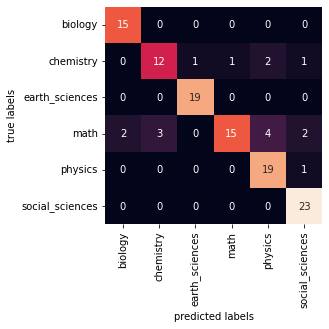

In [72]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_TFIDFSVC = confusion_matrix(Y_test_pre2, labels_TFIDFSVC)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_TFIDFSVC, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [73]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_TFIDFSVC, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.88      1.00      0.94        15
      chemistry       0.80      0.71      0.75        17
 earth_sciences       0.95      1.00      0.97        19
           math       0.94      0.58      0.71        26
        physics       0.76      0.95      0.84        20
social_sciences       0.85      1.00      0.92        23

       accuracy                           0.86       120
      macro avg       0.86      0.87      0.86       120
   weighted avg       0.87      0.86      0.85       120



## - Vectorizer: Count Vectorizer; Classifier: Support Vector Classifier

In [74]:
# convert to a numerical vector
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

model_CVSVC = make_pipeline(CountVectorizer(), LinearSVC(random_state=0, tol=1e-5))

In [75]:
# Apply model to the training data, then predict labels for test data
model_CVSVC.fit(X_train_pre2, Y_train_pre2)
labels_CVSVC = model_TFIDFSVC.predict(X_test_pre2)

c:\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


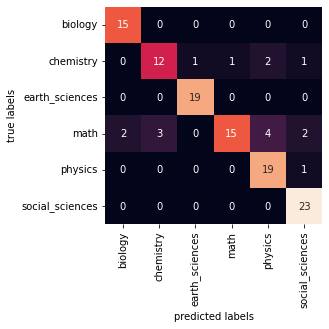

In [76]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_CVSVC = confusion_matrix(Y_test_pre2, labels_CVSVC)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_CVSVC, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [77]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_CVSVC, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.88      1.00      0.94        15
      chemistry       0.80      0.71      0.75        17
 earth_sciences       0.95      1.00      0.97        19
           math       0.94      0.58      0.71        26
        physics       0.76      0.95      0.84        20
social_sciences       0.85      1.00      0.92        23

       accuracy                           0.86       120
      macro avg       0.86      0.87      0.86       120
   weighted avg       0.87      0.86      0.85       120



## - Vectorizer: Bigram; Classifier: Support Vector Classifier

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

model_biSVC = make_pipeline(CountVectorizer(ngram_range = (2,2)), LinearSVC(random_state=0, tol=1e-5))

In [79]:
# Apply model to the training data, then predict labels for test data
model_biSVC.fit(X_train_pre2, Y_train_pre2)
labels_biSVC = model_biSVC.predict(X_test_pre2)

c:\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


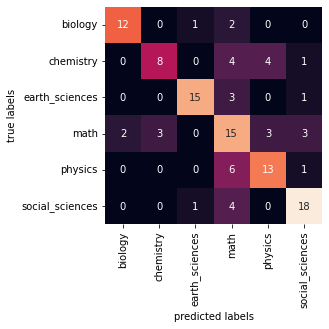

In [80]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_biSVC = confusion_matrix(Y_test_pre2, labels_biSVC)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_biSVC, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [81]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_biSVC, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.86      0.80      0.83        15
      chemistry       0.73      0.47      0.57        17
 earth_sciences       0.88      0.79      0.83        19
           math       0.44      0.58      0.50        26
        physics       0.65      0.65      0.65        20
social_sciences       0.75      0.78      0.77        23

       accuracy                           0.68       120
      macro avg       0.72      0.68      0.69       120
   weighted avg       0.70      0.68      0.68       120



## - Vectorizer: TF-IDF; Classifier: Multinomial Naive Bayes

In [62]:
# convert to a numerical vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB    
from sklearn.pipeline import make_pipeline

model_TFIDFMNB = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [63]:
# Apply model to the training data, then predict labels for test data
# X_data = X_train_pre2.toarray()  # according to the error reported
model_TFIDFMNB.fit(X_train_pre2, Y_train_pre2)
labels_TFIDFMNB = model_TFIDFMNB.predict(X_test_pre2)

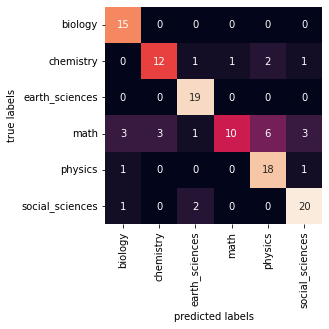

In [64]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_TFIDFMNB = confusion_matrix(Y_test_pre2, labels_TFIDFMNB)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_TFIDFMNB, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [65]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_TFIDFMNB, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.75      1.00      0.86        15
      chemistry       0.80      0.71      0.75        17
 earth_sciences       0.83      1.00      0.90        19
           math       0.91      0.38      0.54        26
        physics       0.69      0.90      0.78        20
social_sciences       0.80      0.87      0.83        23

       accuracy                           0.78       120
      macro avg       0.80      0.81      0.78       120
   weighted avg       0.80      0.78      0.76       120



## - Vectorizer: Count Vectorizer; Classifier: Multinomial Naive Bayes

In [66]:
# convert to a numerical vector
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB    
from sklearn.pipeline import make_pipeline

model_CVMNB = make_pipeline(CountVectorizer(), MultinomialNB())

In [67]:
# Apply model to the training data, then predict labels for test data
# X_data = X_train_pre2.toarray()  # according to the error reported
model_CVMNB.fit(X_train_pre2, Y_train_pre2)
labels_CVMNB = model_CVMNB.predict(X_test_pre2)

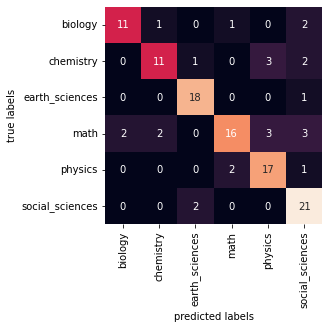

In [68]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_CVMNB = confusion_matrix(Y_test_pre2, labels_CVMNB)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_CVMNB, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [69]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_CVMNB, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.85      0.73      0.79        15
      chemistry       0.79      0.65      0.71        17
 earth_sciences       0.86      0.95      0.90        19
           math       0.84      0.62      0.71        26
        physics       0.74      0.85      0.79        20
social_sciences       0.70      0.91      0.79        23

       accuracy                           0.78       120
      macro avg       0.80      0.78      0.78       120
   weighted avg       0.79      0.78      0.78       120



## - Vectorizer: Bigram; Classifier: Multinomial Naive Bayes

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model_biMNB = make_pipeline(CountVectorizer(ngram_range = (2,2)), MultinomialNB())

In [71]:
# Apply model to the training data, then predict labels for test data
# X_data = X_train_pre2.toarray()  # according to the error reported
model_biMNB.fit(X_train_pre2, Y_train_pre2)
labels_biMNB = model_biMNB.predict(X_test_pre2)

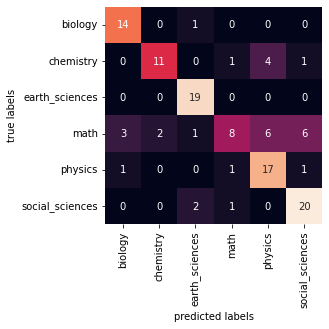

In [72]:
# Let's plot the confusion matrix: 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_biMNB = confusion_matrix(Y_test_pre2, labels_biMNB)
# Notice here the Y_test is in one-hot encoding, and we should transform the format. 
sns.heatmap(mat_biMNB, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(tags_to_index_dict.keys()), yticklabels=list(tags_to_index_dict.keys()))
            # the xticklabels should be a list, so I should convert the keys of BBC_categories into list
plt.xlabel('predicted labels')
plt.ylabel('true labels');

In [73]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(Y_test_pre2, labels_biMNB, 
                            target_names=list(tags_to_index_dict.keys())))
# Here we should also transform the format into Y_test.argmax(axis=1), which are the labels in numbers
# rather than one-hot encoding. 

                 precision    recall  f1-score   support

        biology       0.78      0.93      0.85        15
      chemistry       0.85      0.65      0.73        17
 earth_sciences       0.83      1.00      0.90        19
           math       0.73      0.31      0.43        26
        physics       0.63      0.85      0.72        20
social_sciences       0.71      0.87      0.78        23

       accuracy                           0.74       120
      macro avg       0.75      0.77      0.74       120
   weighted avg       0.75      0.74      0.72       120



## [EXTRA] 1D convnet (CNN)

In [66]:
# This cell of codes is from Chollet's Ch. 6.4
# It's much quicker than RNN, though it's slower than the first method we have used. 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model_1DCNN = Sequential()

# The below settings are learned from Gupta, Majumder et al.'s book 'Practical Natural Language 
# Processing' Ch.4.5.1

model_1DCNN.add(layers.Embedding(10000, 128, input_length=600))
model_1DCNN.add(layers.Conv1D(128, 6, activation='relu'))
# The above layer creates a convolution kernel that is convolved with the layer input over a single 
# spatial (or temporal) dimension to produce a tensor of outputs.
model_1DCNN.add(layers.MaxPooling1D(5))
model_1DCNN.add(layers.Conv1D(128, 6, activation='relu'))
model_1DCNN.add(layers.MaxPooling1D(5))
model_1DCNN.add(layers.Conv1D(128, 6, activation='relu'))
model_1DCNN.add(layers.GlobalMaxPooling1D())
model_1DCNN.add(layers.Dense(128, activation='relu'))
model_1DCNN.add(layers.Dense(6))

model_1DCNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_1DCNN.summary()

# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_1DCNN = model_1DCNN.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=128, # set a fixed batch size
                            epochs=1,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 595, 128)          98432     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 119, 128)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 114, 128)          98432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 128)          

In [67]:
results_1DCNN = model_1DCNN.evaluate(X_test2, Y_test2)
results_1DCNN

4/4 [==============================] - 0s 48ms/step - loss: 5.1839 - accuracy: 0.1417


[5.183944225311279, 0.14166666567325592]

In [86]:
# Feb 03 The below settings and layers arrangement is from: 
# https://www.bilibili.com/video/BV1u7411d7zU/?share_source=copy_web&vd_source=296c14837e03501f00801a512d70f87e
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model_1DCNN = Sequential()

model_1DCNN.add(layers.Embedding(input_dim=2000,    # size of the vocabulary
                                 output_dim=128, 
                                 input_length=600))
model_1DCNN.add(layers.Conv1D(256,    # output size
                              3,     # conv core size
                              padding='same', 
                              activation='relu'))
# The above layer creates a convolution kernel that is convolved with the layer input over a single 
# spatial (or temporal) dimension to produce a tensor of outputs.
model_1DCNN.add(layers.MaxPooling1D(3, 3, padding='same'))
model_1DCNN.add(layers.Conv1D(32, 3, padding='same', activation='relu'))
model_1DCNN.add(layers.Flatten())
model_1DCNN.add(layers.Dropout(0.3))
model_1DCNN.add(layers.BatchNormalization())   # the layer of batch normalization
model_1DCNN.add(layers.Dense(256, activation='relu'))
model_1DCNN.add(layers.Dropout(0.2))
model_1DCNN.add(layers.Dense(6, activation='softmax'))

model_1DCNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_1DCNN.summary()

# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_1DCNN = model_1DCNN.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=64, # set a fixed batch size
                            epochs=25,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 600, 128)          256000    
                                                                 
 conv1d_4 (Conv1D)           (None, 600, 256)          98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 200, 256)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 200, 32)           24608     
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dropout_12 (Dropout)        (None, 6400)              0         
                                                     

In [87]:
results_1DCNN = model_1DCNN.evaluate(X_test2, Y_test2)
results_1DCNN

4/4 [==============================] - 0s 31ms/step - loss: 1.2782 - accuracy: 0.5750


[1.2782318592071533, 0.574999988079071]

## [EXTRA] RNN

In [64]:
# This cell of codes is from Chollet's Ch. 6.4
# It's much quicker than RNN, though it's slower than the first method we have used. 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding

model_RNN01 = Sequential()

model_RNN01.add(Embedding(10000, 128, input_length=600))
model_RNN01.add(SimpleRNN(128))


model_RNN01.add(Dense(6, activation='sigmoid'))

model_RNN01.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_RNN01.summary()

# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_RNN01 = model_RNN01.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=64, # set a fixed batch size
                            epochs=25,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 1,313,670
Trainable params: 1,313,670
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
6/6 [==============================] - 2s 221ms/step - loss: 1.7955 - accuracy: 0.2057 - val_loss: 1.7483 - val_accuracy: 0.2188
Epoch 2/25
6/6 [==============================] - 1s 176ms/step - loss: 1.7382 - accuracy: 0.2526 - val_loss: 1.7432 - val_accuracy: 0.1875
Epoch 3/25
6/6 [==============

In [66]:
final_RNN01 = model_RNN01.evaluate(X_test2, Y_test2)
final_RNN01

4/4 [==============================] - 0s 31ms/step - loss: 1.7874 - accuracy: 0.2583


[1.7874038219451904, 0.25833332538604736]

In [69]:
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  

In [81]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()         # from TensorFlow 1.x to 2.x

# below codes source: Book - TensorFlow Machine Learning Cookbook, by Nick McClure
def RNN02(epochs, batch_size, learning_rate, rnn_size, max_sequence_length, vocab_size, embedding_size): 
    sess = tf.Session()
    dropout_keep_prob = tf.placeholder(tf.float32)
    x_data = tf.placeholder(tf.int32, [None, max_sequence_length])
    y_output = tf.placeholder(tf.int32, [None])
    embedding_mat = tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0))
    embedding_output = tf.nn.embedding_lookup(embedding_mat, x_data)
    
    #########################################################
    
    # model: 
    cell = tf.nn.rnn_cell.BasicRNNCell(num_units = rnn_size)
    output, state = tf.nn.dynamic_rnn(cell, embedding_output, dtype=tf.float32)
    output = tf.nn.dropout(output, dropout_keep_prob)
    output = tf.transpose(output, [1, 0, 2])
    last = tf.gather(output, int(output.get_shape()[0]) - 1)
    weight = tf.Variable(tf.truncated_normal([rnn_size, 2], stddev=0.1))
    bias = tf.Variable(tf.constant(0.1, shape=[6]))      # 6 classes output
    logits_out = tf.nn.softmax(tf.matmul(last, weight) + bias)
    
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits_out, 1), tf.cast(y_output, tf.int64)), tf.float32))
    
    # optimizer: 
    optimizer = tf.train.RMSPropOptimizer(learning_rate)
    train_step = optimizer.minimize(loss)
    init = tf.global_variables_initializer()
    sess.run(init)
    
    RNN02_train_loss = []
    RNN02_test_loss = []
    RNN02_train_accuracy = []
    RNN02_test_accuracy = []
    # start training: 
    for epoch in range(epochs): 
        # shuffle traning data: 
        shuffled_ix = np.random.permutation(np.arange(len(X_train_partial2)))
        RNN02_x_train = X_train_partial2[shuffled_ix]
        RNN02_y_train = Y_train_partial2[shuffled_ix]

        num_batches = int(len(X_train_partial2) / batch_size) + 1
        for i in range(num_batches): 
            # select training data: 
            min_ix = i * batch_size
            max_ix = mp.min([len(RNN02_x_train), ((i+1)*batch_size)])
            RNN02_x_train_batch = RNN02_x_train[min_ix:max_ix]
            RNN02_y_train_batch = RNN02_y_train[min_ix:max_ix]
            # run the training step: 
            RNN02_train_dict = {x_data: RNN02_x_train_batch, y_output: RNN02_y_train_batch, dropout_keep_prob: 0.5}
            sess.run(train_step, feed_dict = RNN02_train_dict)
        # loss and accuracy: 
        temp_train_loss, temp_train_acc = sess.run([loss, accuracy], feed_dict = RNN02_train_dict)
        train_loss.append(temp_train_loss)
        train_accuracy.append(temp_train_acc)
        # run Evel step:
        test_dict = {x_data: X_val2, y_output: Y_val2, dropout_keep_prob: 1.0}
        temp_test_loss, temp_test_acc = sess.run([loss, accuracy], feed_dict = RNN02_train_dict)
        test_loss.append(temp_test_loss)
        test_accuracy.append(temp_test_acc)
        print('Epoch: {}, test loss: {:.2}, test accuracy: {:.2}'.format(epoch+1, temp_test_loss, temp_test_acc))

In [82]:
RNN02(epochs = 20, batch_size = 250, learning_rate = 0.0005, rnn_size=10, max_sequence_length = 25, vocab_size = 100, embedding_size = 50)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_4516/3924301991.py:16: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.nn.rnn_cell.BasicRNNCell(num_units = rnn_size)


ValueError: Dimensions must be equal, but are 2 and 6 for '{{node add}} = AddV2[T=DT_FLOAT](MatMul, add/ReadVariableOp)' with input shapes: [?,2], [6].

### LSTM Layer

In [81]:
import random
random.seed(15)
np.random.seed(15)
tf.random.set_seed(15)

In [82]:
# this cell of codes is from Chollet's book Ch.6

from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

model_RNN = Sequential()
# the embedding layer has the shape of (samples, input_length, 8): 
model_RNN.add(Embedding(600, 128))  
# model_RNN.add(SimpleRNN(64))
model_RNN.add(LSTM(64, activation='tanh', 
                             recurrent_activation='hard_sigmoid', 
                             use_bias=True, 
                             kernel_initializer='glorot_uniform', 
                             recurrent_initializer='orthogonal',
                             bias_initializer='zeros', 
                             unit_forget_bias=True, 
                             dropout=0.0, recurrent_dropout=0.0, 
                             return_sequences=True))
model_RNN.add(Dropout(0.4))
model_RNN.add(LSTM(64, activation='tanh'))
model_RNN.add(Dropout(0.4))

model_RNN.add(Dense(6, activation='softmax'))
              
model_RNN.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_RNN.summary()

# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_RNN = model_RNN.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=128, # set a fixed batch size
                            epochs=15,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         76800     
                                                                 
 lstm_10 (LSTM)              (None, None, 64)          49408     
                                                                 
 dropout_6 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 159,622
Trainable params: 159,622
Non-tr

In [83]:
final_LSTM = model_RNN.evaluate(X_test2, Y_test2)
final_LSTM

4/4 [==============================] - 0s 98ms/step - loss: 1.7375 - accuracy: 0.2667


[1.7375144958496094, 0.2666666805744171]

In [75]:
# Source: https://blog.csdn.net/weixin_44106928/article/details/103083853, copyright: MarDino in CSDN forum
from tensorflow import keras
import tensorflow.keras.layers

class DropConnect(layers.Layer):

    def __init__(self, drop_connect_rate=0., **kwargs):
        super(DropConnect, self).__init__(**kwargs)
        self.drop_connect_rate = float(drop_connect_rate)

    def call(self, inputs, training=None):

        def drop_connect():
            keep_prob = 1.0 - self.drop_connect_rate

            # Compute drop_connect tensor
            batch_size = tf.shape(inputs)[0]
            random_tensor = keep_prob
            random_tensor += K.random_uniform([batch_size, 1, 1, 1], dtype=inputs.dtype)
            binary_tensor = tf.floor(random_tensor)
            output = (inputs / keep_prob) * binary_tensor
            return output

        return K.in_train_phase(drop_connect, inputs, training=training)


In [84]:
# trying to use the settings mentioned in AWD-LSTM

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD

# def scheduler(epoch, lr):
#     lr = 30
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)
    
sgd = SGD(learning_rate=30, weight_decay=0.0000012)

model_RNN = Sequential()

# model_RNN.add(Dropout(0.65))
# the embedding layer has the shape of (samples, input_length, 8): 
model_RNN.add(Embedding(600, 400))  
model_RNN.add(Dropout(0.1))
model_RNN.add(SimpleRNN(1150))
model_RNN.add(Dropout(0.2))
model_RNN.add(LSTM(1150, activation='tanh', 
                             
                             dropout=0.0, recurrent_dropout=0.0, 
                             return_sequences=True))
model_RNN.add(Dropout(0.4))

model_RNN.add(Dense(6, activation='softmax'))
              
model_RNN.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model_RNN.summary()

# train-validation splitting
X_train_partial2, X_val2, Y_train_partial2, Y_val2 = train_test_split(
        X_train2, Y_train2, test_size=0.20, random_state=15)  
# we set a random state in order to repeat the experiment later

history_RNN = model_RNN.fit(X_train_partial2, 
                            Y_train_partial2,
                            batch_size=80, # set a fixed batch size
                            epochs=15,  # we just set any fixed number for control
                            validation_data=(X_val2, Y_val2), 
                           callbacks = [tensorboard_callback, reduce_lr])

ValueError: Input 0 of layer "lstm_6" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1150)

## [EXTRA]. Using Latent Dirchlet Allocation (Unsupervised Learning)

In [87]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
# turn the documents into vectors
def create_count_vectorizer(documents):
    count_vectorizer = CountVectorizer(max_features=1500)
    data = count_vectorizer.fit_transform(documents)
    return (count_vectorizer, data)

In [89]:
# create the LDA model (note that usually num_topics is unknown)
def create_and_fit_lda(data, num_topics):
    lda = LDA(n_components = num_topics, n_jobs=-1)
    lda.fit(data)
    return lda

In [90]:
# identify & print the most common topic words
def get_most_common_words_for_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    word_dict = {}
    for topic_index, topic in enumerate(model.components_):
        this_topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        word_dict[topic_index] = this_topic_words
    return word_dict
    
def print_topic_words(word_dict):
    for key in word_dict.keys():
        print(f"Topic {key}")
        print("\t", word_dict[key])

In [91]:
documents = sci_X_regularised_united # a list of 600 strings, regularised. 

In [92]:
number_topics = 6

In [93]:
# create vectorizer & model, take a while
(vectorizer, data) = create_count_vectorizer(documents)
lda = create_and_fit_lda(data, number_topics)

In [94]:
# inspect the contents of the topics
# take a while
topic_words = get_most_common_words_for_topics(lda, vectorizer, 10)
print_topic_words(topic_words)

Topic 0
	 ['study', 'year', 'research', 'one', 'university', 'say', 'find', 'also', 'social', 'people']
Topic 1
	 ['cell', 'fig', 'expression', 'gene', 'study', 'also', 'show', 'result', 'group', 'level']
Topic 2
	 ['quantum', 'state', 'phase', 'fig', 'show', 'system', 'two', 'time', 'use', 'energy']
Topic 3
	 ['use', 'cell', '10', 'sample', 'min', 'flow', 'perform', 'mm', 'study', 'medium']
Topic 4
	 ['hurricane', 'storm', 'water', 'flood', 'change', 'increase', 'crystal', 'temperature', 'show', 'plasma']
Topic 5
	 ['data', 'use', 'model', 'method', 'fig', 'structure', 'magnetic', 'result', 'field', 'study']


(Oct 25)
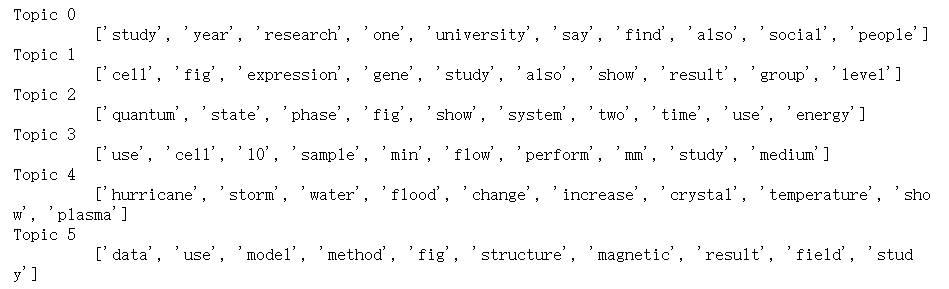

- It is not surprise that our LDA has classified the whole dataset based on a completely different mechanism from the scientific-subject-based rubric which we use, just because LDA takes into account for all of the words and it aggregates them based on general essay classification mechanism. It is rather like the categories shown in the 'Event Registry' searching website. 

- Topic 0: talks about the general administration issue within academic research area. 

- Topic 1: sounds like cell biology field. 

- Topic 2: sound like physics field. 

- Topic 3: Why this category is so similar to the Topic 1? It just shifts its attention a little bit to the biological experiment area. 

- Topic 4: talks about the weather, geographical subjects. 

- Topic 5: Again it's physics? Though a little bit for the experimental physics. 